In [676]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from zipfile import ZipFile
from scipy.stats import chi2_contingency
plt.rcParams['figure.figsize'] = (8, 5)

In [677]:
pd.set_option('display.max_columns', None) 
pd.set_option('display.max_rows', None) 

In [678]:
df = pd.read_pickle("./Data/avpat.pickle")
df.head()

,PATIENTID,SEX,LINKNUMBER,ETHNICITY,NEWVITALSTATUS,VITALSTATUSDATE
0,10000001,F,810000001,White British,A,2017-01-17
1,10000002,F,810000002,NaN,A,2017-01-14
4,10000005,F,810000005,NaN,A,2017-01-16
6,10000008,F,810000008,NaN,A,2017-01-16
10,10000014,F,810000014,White British,A,2017-01-16


In [679]:
# df = pd.read_csv("./Data/avpat.csv", sep = "^", index_col = 0)
# df.head()

In [680]:
df.shape

(515398, 6)

In [681]:
zf = ZipFile('../../Data/sim_av_tumour.zip')
csv = zf.open('sim_av_tumour.csv')
avtum = pd.read_csv(csv)
avtum.head()

/home/elsa/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (5,6,8,9,17,18,20,22,26,32) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,TUMOURID,PATIENTID,DIAGNOSISDATEBEST,SITE_ICD10_O2,SITE_ICD10_O2_3CHAR,MORPH_ICD10_O2,BEHAVIOUR_ICD10_O2,T_BEST,N_BEST,M_BEST,STAGE_BEST,STAGE_BEST_SYSTEM,GRADE,AGE,SEX,CREG_CODE,LINKNUMBER,SCREENINGSTATUSFULL_CODE,ER_STATUS,ER_SCORE,PR_STATUS,PR_SCORE,HER2_STATUS,CANCERCAREPLANINTENT,PERFORMANCESTATUS,CNS,ACE27,GLEASON_PRIMARY,GLEASON_SECONDARY,GLEASON_TERTIARY,GLEASON_COMBINED,DATE_FIRST_SURGERY,LATERALITY,QUINTILE_2015
0,10000001,10000001,2015-11-06,C443,C44,8090,3,NaN,NaN,NaN,?,NaN,GX,90,2,L0801,810000001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2015-11-06,L,3
1,10000002,10000002,2015-10-06,C449,C44,8090,3,NaN,NaN,NaN,?,NaN,GX,84,2,L0301,810000002,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2015-10-06,8,2
2,10000003,10000003,2013-01-30,C449,C44,8090,3,NaN,NaN,NaN,?,NaN,GX,68,1,L0401,810000003,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8,1 - least deprived
3,10000004,10000004,2015-09-15,C449,C44,8090,3,NaN,NaN,NaN,?,NaN,GX,69,1,L1001,810000004,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8,2
4,10000005,10000005,2014-11-01,C449,C44,8090,3,NaN,NaN,NaN,U,NaN,GX,58,2,L0401,810000005,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2014-11-01,8,2


In [682]:
avtum.shape

(1402817, 34)

In [683]:
print("The original dataset has data for %d patients" % len(avtum))
print("After removing duplicates, the dataset has data for %d patients" % len(avtum.drop_duplicates()))

The original dataset has data for 1402817 patients
After removing duplicates, the dataset has data for 1402817 patients


In [684]:
df = df.merge(avtum, left_on = 'PATIENTID', right_on = 'PATIENTID', how = 'left')
df.head()

,PATIENTID,SEX_x,LINKNUMBER_x,ETHNICITY,NEWVITALSTATUS,VITALSTATUSDATE,TUMOURID,DIAGNOSISDATEBEST,SITE_ICD10_O2,SITE_ICD10_O2_3CHAR,MORPH_ICD10_O2,BEHAVIOUR_ICD10_O2,T_BEST,N_BEST,M_BEST,STAGE_BEST,STAGE_BEST_SYSTEM,GRADE,AGE,SEX_y,CREG_CODE,LINKNUMBER_y,SCREENINGSTATUSFULL_CODE,ER_STATUS,ER_SCORE,PR_STATUS,PR_SCORE,HER2_STATUS,CANCERCAREPLANINTENT,PERFORMANCESTATUS,CNS,ACE27,GLEASON_PRIMARY,GLEASON_SECONDARY,GLEASON_TERTIARY,GLEASON_COMBINED,DATE_FIRST_SURGERY,LATERALITY,QUINTILE_2015
0,10000001,F,810000001,White British,A,2017-01-17,10000001,2015-11-06,C443,C44,8090,3,NaN,NaN,NaN,?,NaN,GX,90,2,L0801,810000001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2015-11-06,L,3
1,10000002,F,810000002,NaN,A,2017-01-14,10000002,2015-10-06,C449,C44,8090,3,NaN,NaN,NaN,?,NaN,GX,84,2,L0301,810000002,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2015-10-06,8,2
2,10000005,F,810000005,NaN,A,2017-01-16,10000005,2014-11-01,C449,C44,8090,3,NaN,NaN,NaN,U,NaN,GX,58,2,L0401,810000005,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2014-11-01,8,2
3,10000008,F,810000008,NaN,A,2017-01-16,10000008,2013-02-12,C443,C44,8090,3,NaN,NaN,NaN,?,NaN,GX,65,2,L0801,810000008,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013-02-12,L,4
4,10000014,F,810000014,White British,A,2017-01-16,10000014,2013-06-10,C445,C44,8090,3,NaN,NaN,NaN,?,NaN,GX,62,2,L1001,810000014,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013-06-10,8,2


In [685]:
df.shape

(544219, 39)

In [686]:
df = df.drop(['SEX_y',"LINKNUMBER_y"], axis = 1)
df.head()

,PATIENTID,SEX_x,LINKNUMBER_x,ETHNICITY,NEWVITALSTATUS,VITALSTATUSDATE,TUMOURID,DIAGNOSISDATEBEST,SITE_ICD10_O2,SITE_ICD10_O2_3CHAR,MORPH_ICD10_O2,BEHAVIOUR_ICD10_O2,T_BEST,N_BEST,M_BEST,STAGE_BEST,STAGE_BEST_SYSTEM,GRADE,AGE,CREG_CODE,SCREENINGSTATUSFULL_CODE,ER_STATUS,ER_SCORE,PR_STATUS,PR_SCORE,HER2_STATUS,CANCERCAREPLANINTENT,PERFORMANCESTATUS,CNS,ACE27,GLEASON_PRIMARY,GLEASON_SECONDARY,GLEASON_TERTIARY,GLEASON_COMBINED,DATE_FIRST_SURGERY,LATERALITY,QUINTILE_2015
0,10000001,F,810000001,White British,A,2017-01-17,10000001,2015-11-06,C443,C44,8090,3,NaN,NaN,NaN,?,NaN,GX,90,L0801,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2015-11-06,L,3
1,10000002,F,810000002,NaN,A,2017-01-14,10000002,2015-10-06,C449,C44,8090,3,NaN,NaN,NaN,?,NaN,GX,84,L0301,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2015-10-06,8,2
2,10000005,F,810000005,NaN,A,2017-01-16,10000005,2014-11-01,C449,C44,8090,3,NaN,NaN,NaN,U,NaN,GX,58,L0401,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2014-11-01,8,2
3,10000008,F,810000008,NaN,A,2017-01-16,10000008,2013-02-12,C443,C44,8090,3,NaN,NaN,NaN,?,NaN,GX,65,L0801,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013-02-12,L,4
4,10000014,F,810000014,White British,A,2017-01-16,10000014,2013-06-10,C445,C44,8090,3,NaN,NaN,NaN,?,NaN,GX,62,L1001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013-06-10,8,2


In [687]:
df.rename(columns={'SEX_x': 'SEX', 'LINKNUMBER_x': 'LINKNUMBER'}, inplace=True)
df.head()

,PATIENTID,SEX,LINKNUMBER,ETHNICITY,NEWVITALSTATUS,VITALSTATUSDATE,TUMOURID,DIAGNOSISDATEBEST,SITE_ICD10_O2,SITE_ICD10_O2_3CHAR,MORPH_ICD10_O2,BEHAVIOUR_ICD10_O2,T_BEST,N_BEST,M_BEST,STAGE_BEST,STAGE_BEST_SYSTEM,GRADE,AGE,CREG_CODE,SCREENINGSTATUSFULL_CODE,ER_STATUS,ER_SCORE,PR_STATUS,PR_SCORE,HER2_STATUS,CANCERCAREPLANINTENT,PERFORMANCESTATUS,CNS,ACE27,GLEASON_PRIMARY,GLEASON_SECONDARY,GLEASON_TERTIARY,GLEASON_COMBINED,DATE_FIRST_SURGERY,LATERALITY,QUINTILE_2015
0,10000001,F,810000001,White British,A,2017-01-17,10000001,2015-11-06,C443,C44,8090,3,NaN,NaN,NaN,?,NaN,GX,90,L0801,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2015-11-06,L,3
1,10000002,F,810000002,NaN,A,2017-01-14,10000002,2015-10-06,C449,C44,8090,3,NaN,NaN,NaN,?,NaN,GX,84,L0301,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2015-10-06,8,2
2,10000005,F,810000005,NaN,A,2017-01-16,10000005,2014-11-01,C449,C44,8090,3,NaN,NaN,NaN,U,NaN,GX,58,L0401,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2014-11-01,8,2
3,10000008,F,810000008,NaN,A,2017-01-16,10000008,2013-02-12,C443,C44,8090,3,NaN,NaN,NaN,?,NaN,GX,65,L0801,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013-02-12,L,4
4,10000014,F,810000014,White British,A,2017-01-16,10000014,2013-06-10,C445,C44,8090,3,NaN,NaN,NaN,?,NaN,GX,62,L1001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013-06-10,8,2


In [688]:
df.shape

(544219, 37)

In [689]:
df.dtypes

PATIENTID                      int64
SEX                         category
LINKNUMBER                     int64
ETHNICITY                   category
NEWVITALSTATUS              category
VITALSTATUSDATE               object
TUMOURID                       int64
DIAGNOSISDATEBEST             object
SITE_ICD10_O2                 object
SITE_ICD10_O2_3CHAR           object
MORPH_ICD10_O2                object
BEHAVIOUR_ICD10_O2            object
T_BEST                        object
N_BEST                        object
M_BEST                        object
STAGE_BEST                    object
STAGE_BEST_SYSTEM            float64
GRADE                         object
AGE                            int64
CREG_CODE                     object
SCREENINGSTATUSFULL_CODE      object
ER_STATUS                     object
ER_SCORE                     float64
PR_STATUS                     object
PR_SCORE                     float64
HER2_STATUS                   object
CANCERCAREPLANINTENT          object
P

In [690]:
df.isna().sum()

PATIENTID                        0
SEX                              0
LINKNUMBER                       0
ETHNICITY                    84269
NEWVITALSTATUS                   0
VITALSTATUSDATE                  0
TUMOURID                         0
DIAGNOSISDATEBEST                0
SITE_ICD10_O2                  189
SITE_ICD10_O2_3CHAR            157
MORPH_ICD10_O2                 179
BEHAVIOUR_ICD10_O2             144
T_BEST                      309056
N_BEST                      345252
M_BEST                      374288
STAGE_BEST                       4
STAGE_BEST_SYSTEM           299118
GRADE                        28257
AGE                              0
CREG_CODE                        0
SCREENINGSTATUSFULL_CODE    457451
ER_STATUS                   446384
ER_SCORE                    498391
PR_STATUS                   481454
PR_SCORE                    518204
HER2_STATUS                 458241
CANCERCAREPLANINTENT        392947
PERFORMANCESTATUS           415888
CNS                 

In [691]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 544219 entries, 0 to 544218
Data columns (total 37 columns):
PATIENTID                   544219 non-null int64
SEX                         544219 non-null category
LINKNUMBER                  544219 non-null int64
ETHNICITY                   459950 non-null category
NEWVITALSTATUS              544219 non-null category
VITALSTATUSDATE             544219 non-null object
TUMOURID                    544219 non-null int64
DIAGNOSISDATEBEST           544219 non-null object
SITE_ICD10_O2               544030 non-null object
SITE_ICD10_O2_3CHAR         544062 non-null object
MORPH_ICD10_O2              544040 non-null object
BEHAVIOUR_ICD10_O2          544075 non-null object
T_BEST                      235163 non-null object
N_BEST                      198967 non-null object
M_BEST                      169931 non-null object
STAGE_BEST                  544215 non-null object
STAGE_BEST_SYSTEM           245101 non-null float64
GRADE             

In [692]:
df.count()

PATIENTID                   544219
SEX                         544219
LINKNUMBER                  544219
ETHNICITY                   459950
NEWVITALSTATUS              544219
VITALSTATUSDATE             544219
TUMOURID                    544219
DIAGNOSISDATEBEST           544219
SITE_ICD10_O2               544030
SITE_ICD10_O2_3CHAR         544062
MORPH_ICD10_O2              544040
BEHAVIOUR_ICD10_O2          544075
T_BEST                      235163
N_BEST                      198967
M_BEST                      169931
STAGE_BEST                  544215
STAGE_BEST_SYSTEM           245101
GRADE                       515962
AGE                         544219
CREG_CODE                   544219
SCREENINGSTATUSFULL_CODE     86768
ER_STATUS                    97835
ER_SCORE                     45828
PR_STATUS                    62765
PR_SCORE                     26015
HER2_STATUS                  85978
CANCERCAREPLANINTENT        151272
PERFORMANCESTATUS           128331
CNS                 

In [693]:
df.columns

Index(['PATIENTID', 'SEX', 'LINKNUMBER', 'ETHNICITY', 'NEWVITALSTATUS',
       'VITALSTATUSDATE', 'TUMOURID', 'DIAGNOSISDATEBEST', 'SITE_ICD10_O2',
       'SITE_ICD10_O2_3CHAR', 'MORPH_ICD10_O2', 'BEHAVIOUR_ICD10_O2', 'T_BEST',
       'N_BEST', 'M_BEST', 'STAGE_BEST', 'STAGE_BEST_SYSTEM', 'GRADE', 'AGE',
       'CREG_CODE', 'SCREENINGSTATUSFULL_CODE', 'ER_STATUS', 'ER_SCORE',
       'PR_STATUS', 'PR_SCORE', 'HER2_STATUS', 'CANCERCAREPLANINTENT',
       'PERFORMANCESTATUS', 'CNS', 'ACE27', 'GLEASON_PRIMARY',
       'GLEASON_SECONDARY', 'GLEASON_TERTIARY', 'GLEASON_COMBINED',
       'DATE_FIRST_SURGERY', 'LATERALITY', 'QUINTILE_2015'],
      dtype='object')

In [694]:
columns_selected = ['PATIENTID', 'SEX', 'LINKNUMBER', 'ETHNICITY', 'NEWVITALSTATUS', 'VITALSTATUSDATE', 'TUMOURID',
        'DIAGNOSISDATEBEST','SITE_ICD10_O2','SITE_ICD10_O2_3CHAR', 'BEHAVIOUR_ICD10_O2', 'T_BEST',
        'N_BEST', 'M_BEST','STAGE_BEST', 'GRADE', 'AGE', 
        'CREG_CODE', 'ER_STATUS', 'PR_STATUS', 'HER2_STATUS', 'CANCERCAREPLANINTENT',
        'PERFORMANCESTATUS', 'ACE27', 'DATE_FIRST_SURGERY', 'LATERALITY', 'QUINTILE_2015']
df = df[columns_selected]
df.head()

,PATIENTID,SEX,LINKNUMBER,ETHNICITY,NEWVITALSTATUS,VITALSTATUSDATE,TUMOURID,DIAGNOSISDATEBEST,SITE_ICD10_O2,SITE_ICD10_O2_3CHAR,BEHAVIOUR_ICD10_O2,T_BEST,N_BEST,M_BEST,STAGE_BEST,GRADE,AGE,CREG_CODE,ER_STATUS,PR_STATUS,HER2_STATUS,CANCERCAREPLANINTENT,PERFORMANCESTATUS,ACE27,DATE_FIRST_SURGERY,LATERALITY,QUINTILE_2015
0,10000001,F,810000001,White British,A,2017-01-17,10000001,2015-11-06,C443,C44,3,NaN,NaN,NaN,?,GX,90,L0801,NaN,NaN,NaN,NaN,NaN,NaN,2015-11-06,L,3
1,10000002,F,810000002,NaN,A,2017-01-14,10000002,2015-10-06,C449,C44,3,NaN,NaN,NaN,?,GX,84,L0301,NaN,NaN,NaN,NaN,NaN,NaN,2015-10-06,8,2
2,10000005,F,810000005,NaN,A,2017-01-16,10000005,2014-11-01,C449,C44,3,NaN,NaN,NaN,U,GX,58,L0401,NaN,NaN,NaN,NaN,NaN,NaN,2014-11-01,8,2
3,10000008,F,810000008,NaN,A,2017-01-16,10000008,2013-02-12,C443,C44,3,NaN,NaN,NaN,?,GX,65,L0801,NaN,NaN,NaN,NaN,NaN,NaN,2013-02-12,L,4
4,10000014,F,810000014,White British,A,2017-01-16,10000014,2013-06-10,C445,C44,3,NaN,NaN,NaN,?,GX,62,L1001,NaN,NaN,NaN,NaN,NaN,NaN,2013-06-10,8,2


In [695]:
df = df[df['SITE_ICD10_O2_3CHAR'] == 'C50']
df.head()

,PATIENTID,SEX,LINKNUMBER,ETHNICITY,NEWVITALSTATUS,VITALSTATUSDATE,TUMOURID,DIAGNOSISDATEBEST,SITE_ICD10_O2,SITE_ICD10_O2_3CHAR,BEHAVIOUR_ICD10_O2,T_BEST,N_BEST,M_BEST,STAGE_BEST,GRADE,AGE,CREG_CODE,ER_STATUS,PR_STATUS,HER2_STATUS,CANCERCAREPLANINTENT,PERFORMANCESTATUS,ACE27,DATE_FIRST_SURGERY,LATERALITY,QUINTILE_2015
277,10000752,F,810000752,White British,A,2017-01-16,10335805,2015-11-11,C504,C50,3,NaN,0,NaN,?,G2,68,L0801,NaN,NaN,NaN,NaN,NaN,NaN,2016-09-18,L,1 - least deprived
383,10001050,F,810001050,White British,A,2017-01-16,10335823,2015-10-24,C343,C50,3,NaN,3,1,4C,G3,86,L0401,NaN,NaN,NaN,Z,NaN,NaN,2015-12-15,L,4
709,10001824,F,810001824,Other ethnic group,A,2017-01-17,10335879,2015-03-15,C447,C50,3,2b,NaN,0,3A,G2,87,L0801,NaN,NaN,NaN,C,1,NaN,2015-03-15,L,4
795,10002078,F,810002078,NaN,A,2017-01-14,10335895,2015-06-10,C509,C50,3,4,0,0,3A,G2,72,L1701,NaN,NaN,NaN,NaN,NaN,NaN,2015-07-25,L,1 - least deprived
1301,10003284,F,810003284,NaN,A,2017-01-16,10335978,2014-10-10,C341,C50,3,2,0,0,2B,G3,80,L0801,NaN,NaN,NaN,C,NaN,NaN,2014-10-10,L,1 - least deprived


In [696]:
df.shape

(106760, 27)

In [697]:
original_memory = df.memory_usage(deep=True).sum() / 1024**2 
print('Memory used: %.1f MB' % original_memory)

Memory used: 122.8 MB


In [698]:
df['PATIENTID'].value_counts().sort_values(ascending = False).head(10)

20095545     3
20079902     3
20003454     3
20105479     3
20126463     3
120009798    3
20104157     3
20071892     3
20086402     3
20048814     3
Name: PATIENTID, dtype: int64

In [699]:
df[df.groupby('PATIENTID')['PATIENTID'].transform('size') == 3].sort_values(by='PATIENTID').head(10)

,PATIENTID,SEX,LINKNUMBER,ETHNICITY,NEWVITALSTATUS,VITALSTATUSDATE,TUMOURID,DIAGNOSISDATEBEST,SITE_ICD10_O2,SITE_ICD10_O2_3CHAR,BEHAVIOUR_ICD10_O2,T_BEST,N_BEST,M_BEST,STAGE_BEST,GRADE,AGE,CREG_CODE,ER_STATUS,PR_STATUS,HER2_STATUS,CANCERCAREPLANINTENT,PERFORMANCESTATUS,ACE27,DATE_FIRST_SURGERY,LATERALITY,QUINTILE_2015
136977,20003454,F,820003454,White British,A,2017-01-14,20003454,2014-07-01,C508,C50,3,1b,0,0,1A,G3,66,L1201,P,P,N,NaN,NaN,NaN,2014-08-16,R,4
136978,20003454,F,820003454,White British,A,2017-01-14,20128733,2014-09-15,C509,C50,1,a,NaN,NaN,0,G1,66,L1201,P,P,NaN,NaN,NaN,NaN,2014-09-15,L,4
136979,20003454,F,820003454,White British,A,2017-01-14,20136397,2014-09-15,C509,C50,3,2,0,0,2A,G1,66,L1201,P,NaN,N,NaN,NaN,NaN,2014-09-15,R,4
142983,20010794,F,820010794,Other white background,A,2017-01-17,20010794,2014-04-29,C501,C50,3,1b,0,NaN,1A,G2,62,L0901,P,P,Pm,C,NaN,NaN,2014-06-11,L,1 - least deprived
142984,20010794,F,820010794,Other white background,A,2017-01-17,20129134,2014-06-08,C505,C50,3,1b,0,NaN,1A,G2,62,L0901,P,NaN,B,NaN,9,NaN,2014-07-20,R,1 - least deprived
142985,20010794,F,820010794,Other white background,A,2017-01-17,20136414,2014-06-13,C509,C50,3,NaN,NaN,NaN,?,G2,62,L0901,P,P,NaN,C,1,1,NaN,L,1 - least deprived
144060,20012119,F,820012119,Other white background,A,2017-01-16,20012119,2015-01-29,C508,C50,3,3,2,1,4,G2,76,L0801,NaN,NaN,NaN,NaN,NaN,NaN,2015-04-14,L,5 - most deprived
144061,20012119,F,820012119,Other white background,A,2017-01-16,20129217,2015-12-31,C64,C50,3,NaN,NaN,NaN,?,G2,76,L0801,P,NaN,N,NaN,NaN,NaN,2016-03-10,L,5 - most deprived
144062,20012119,F,820012119,Other white background,A,2017-01-16,20136418,2015-12-31,C509,C50,3,NaN,NaN,NaN,2,G1,76,L0801,P,P,N,NaN,NaN,NaN,2016-03-15,L,5 - most deprived
144300,20012399,F,820012399,White British,A,2017-01-16,20012399,2014-04-08,C508,C50,3,2,0,0,2A,G2,63,L0201,P,P,N,Cm,1,NaN,2014-05-20,L,4


In [700]:
df['NUMBER_TUMOURS'] = df.groupby('PATIENTID')['PATIENTID'].transform('size')
df.head()

,PATIENTID,SEX,LINKNUMBER,ETHNICITY,NEWVITALSTATUS,VITALSTATUSDATE,TUMOURID,DIAGNOSISDATEBEST,SITE_ICD10_O2,SITE_ICD10_O2_3CHAR,BEHAVIOUR_ICD10_O2,T_BEST,N_BEST,M_BEST,STAGE_BEST,GRADE,AGE,CREG_CODE,ER_STATUS,PR_STATUS,HER2_STATUS,CANCERCAREPLANINTENT,PERFORMANCESTATUS,ACE27,DATE_FIRST_SURGERY,LATERALITY,QUINTILE_2015,NUMBER_TUMOURS
277,10000752,F,810000752,White British,A,2017-01-16,10335805,2015-11-11,C504,C50,3,NaN,0,NaN,?,G2,68,L0801,NaN,NaN,NaN,NaN,NaN,NaN,2016-09-18,L,1 - least deprived,1
383,10001050,F,810001050,White British,A,2017-01-16,10335823,2015-10-24,C343,C50,3,NaN,3,1,4C,G3,86,L0401,NaN,NaN,NaN,Z,NaN,NaN,2015-12-15,L,4,1
709,10001824,F,810001824,Other ethnic group,A,2017-01-17,10335879,2015-03-15,C447,C50,3,2b,NaN,0,3A,G2,87,L0801,NaN,NaN,NaN,C,1,NaN,2015-03-15,L,4,1
795,10002078,F,810002078,NaN,A,2017-01-14,10335895,2015-06-10,C509,C50,3,4,0,0,3A,G2,72,L1701,NaN,NaN,NaN,NaN,NaN,NaN,2015-07-25,L,1 - least deprived,1
1301,10003284,F,810003284,NaN,A,2017-01-16,10335978,2014-10-10,C341,C50,3,2,0,0,2B,G3,80,L0801,NaN,NaN,NaN,C,NaN,NaN,2014-10-10,L,1 - least deprived,1


In [701]:
df[df['PATIENTID'] == 20010794]

,PATIENTID,SEX,LINKNUMBER,ETHNICITY,NEWVITALSTATUS,VITALSTATUSDATE,TUMOURID,DIAGNOSISDATEBEST,SITE_ICD10_O2,SITE_ICD10_O2_3CHAR,BEHAVIOUR_ICD10_O2,T_BEST,N_BEST,M_BEST,STAGE_BEST,GRADE,AGE,CREG_CODE,ER_STATUS,PR_STATUS,HER2_STATUS,CANCERCAREPLANINTENT,PERFORMANCESTATUS,ACE27,DATE_FIRST_SURGERY,LATERALITY,QUINTILE_2015,NUMBER_TUMOURS
142983,20010794,F,820010794,Other white background,A,2017-01-17,20010794,2014-04-29,C501,C50,3,1b,0,NaN,1A,G2,62,L0901,P,P,Pm,C,NaN,NaN,2014-06-11,L,1 - least deprived,3
142984,20010794,F,820010794,Other white background,A,2017-01-17,20129134,2014-06-08,C505,C50,3,1b,0,NaN,1A,G2,62,L0901,P,NaN,B,NaN,9,NaN,2014-07-20,R,1 - least deprived,3
142985,20010794,F,820010794,Other white background,A,2017-01-17,20136414,2014-06-13,C509,C50,3,NaN,NaN,NaN,?,G2,62,L0901,P,P,NaN,C,1,1,NaN,L,1 - least deprived,3


In [702]:
df['NUMBER_TUMOURS'].value_counts()

1    101774
2      4842
3       144
Name: NUMBER_TUMOURS, dtype: int64

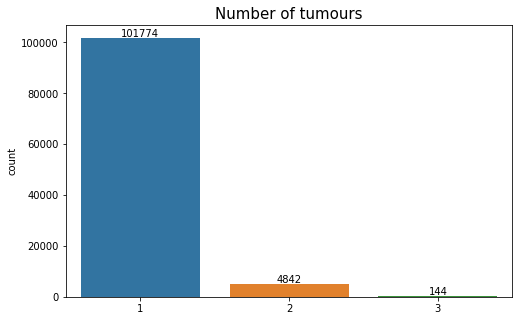

In [703]:
ax = sns.countplot(data = df, x = 'NUMBER_TUMOURS')
ax.set_title('Number of tumours', fontsize=15)
ax.set_xlabel('')
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2, height+500, height, ha="center")

In [704]:
df['ETHNICITY'].value_counts()

White British                    88057
Other white background            3720
Asian Indian                      1470
Other ethnic group                1294
Black Caribbean                   1005
White Irish                        797
Asian Pakistani                    744
Black African                      714
Other Asian background             702
Other black background             363
Chinese                            305
Other mixed background             214
Asian Bangladeshi                  156
White and black Caribbean          115
Mixed white and Asian              110
Mixed white and black African       78
White                               13
Other                                2
Name: ETHNICITY, dtype: int64

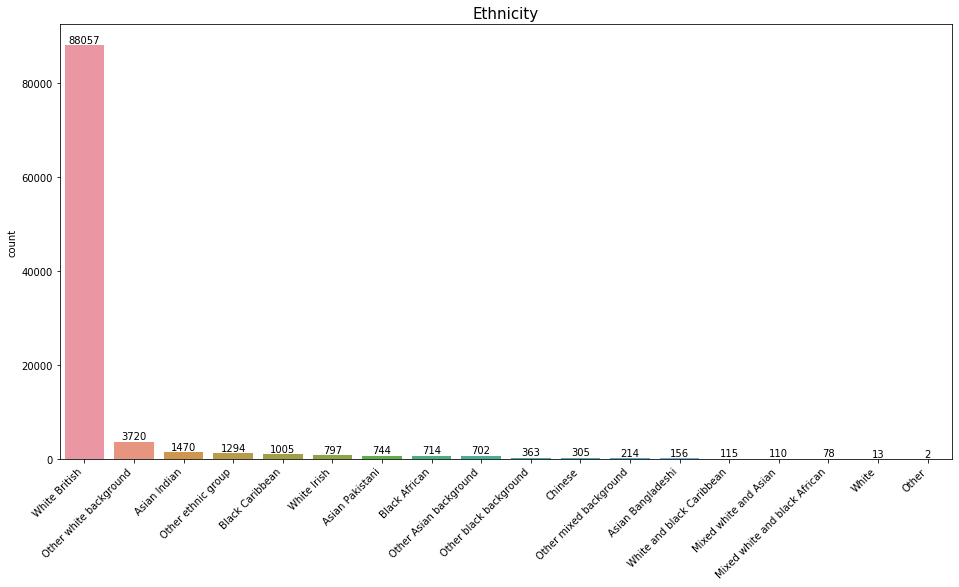

In [705]:
ax = sns.countplot(data = df, x = 'ETHNICITY', order = ['White British','Other white background','Asian Indian', 
                                                       'Other ethnic group','Black Caribbean','White Irish','Asian Pakistani',
                                                       'Black African','Other Asian background','Other black background',
                                                       'Chinese','Other mixed background','Asian Bangladeshi',
                                                       'White and black Caribbean','Mixed white and Asian',
                                                       'Mixed white and black African','White','Other'])
plt.gcf().set_size_inches(16,8)
ax.set_xticklabels(ax.get_xticklabels(), rotation = 45, horizontalalignment = 'right')
ax.set_title('Ethnicity', fontsize=15)
ax.set_xlabel('')
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2, height+500, height, ha="center")

In [706]:
df['NEWVITALSTATUS'].value_counts()

A    105451
D      1309
Name: NEWVITALSTATUS, dtype: int64

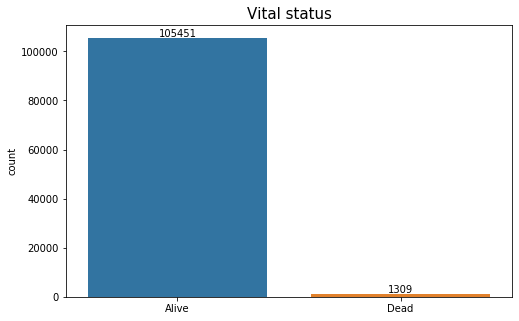

In [707]:
ax = sns.countplot(data = df, x = 'NEWVITALSTATUS')
ax.set_xticklabels(['Alive', 'Dead'])
ax.set_title('Vital status', fontsize=15)
ax.set_xlabel('')
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2, height+500, height, ha="center")

In [708]:
df['SITE_ICD10_O2'].value_counts()

C509    41341
C504    30606
C502     9665
C508     5830
C505     5708
C501     5545
C503     4982
C500     1116
C506      546
C341      188
D051      146
C64       138
D050      135
C443      113
C343      106
C447       73
C446       56
C56        54
C349       48
C539       32
C342       27
C441       23
C442       20
C437       19
C436       13
C66        10
C65        10
C61         8
C060        8
C570        8
C099        8
D033        8
C340        7
C530        6
D073        6
C711        5
D486        4
D037        4
C519        4
C510        4
D411        3
C710        3
C07         3
D391        3
C211        3
D332        3
C73         3
C833        2
C492        2
C348        2
C445        2
C187        2
C210        2
C541        2
D036        2
C179        2
C449        2
D057        2
C679        2
D091        2
C413        1
D469        1
C140        1
D462        1
C20         1
C693        1
C221        1
C719        1
C155        1
C678        1
C629        1
C531  

In [709]:
df['SITE_ICD10_O2'] = df['SITE_ICD10_O2'].astype(str)
def site_icd(value):
    if value == 'C509' or value == 'nan': #C509 is deleted since it means 'unspecified'
        return np.nan
    elif value == 'C500':
        return 'C500 Nipple and areola'
    elif value == 'C501':
        return 'C501 Central portion of breast'
    elif value == 'C502':
        return 'C502 Upper-inner quadrant of breast'
    elif value == 'C503':
        return 'C503 Lower-inner quadrant of breast'
    elif value == 'C504':
        return 'C504 Upper-outer quadrant of breast'
    elif value == 'C505':
        return 'C505 Lower-outer quadrant of breast'
    elif value == 'C506':
        return 'C506 Axillary tail of breast'
    elif value == 'C508':
        return 'C508 Overlapping lesion of breast'
    else:
        return np.nan

df['SITE_ICD10_O2'] = df['SITE_ICD10_O2'].apply(site_icd)
df['SITE_ICD10_O2'].value_counts()

C504 Upper-outer quadrant of breast    30606
C502 Upper-inner quadrant of breast     9665
C508 Overlapping lesion of breast       5830
C505 Lower-outer quadrant of breast     5708
C501 Central portion of breast          5545
C503 Lower-inner quadrant of breast     4982
C500 Nipple and areola                  1116
C506 Axillary tail of breast             546
Name: SITE_ICD10_O2, dtype: int64

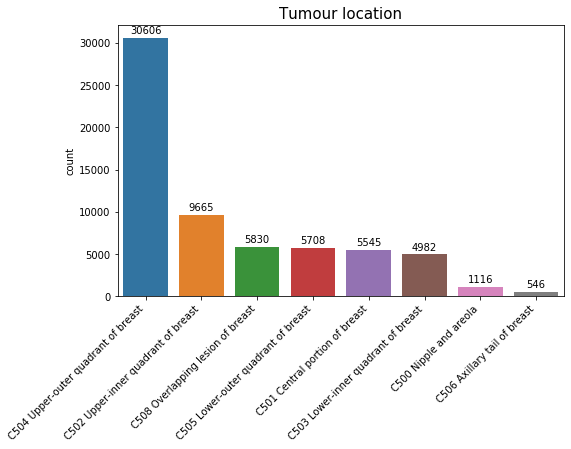

In [710]:
ax = sns.countplot(data = df, x = 'SITE_ICD10_O2', order = ['C504 Upper-outer quadrant of breast',
                                                           'C502 Upper-inner quadrant of breast',
                                                           'C508 Overlapping lesion of breast',
                                                           'C505 Lower-outer quadrant of breast',
                                                           'C501 Central portion of breast',
                                                           'C503 Lower-inner quadrant of breast',
                                                           'C500 Nipple and areola',
                                                           'C506 Axillary tail of breast'])
ax.set_xticklabels(ax.get_xticklabels(), rotation = 45, horizontalalignment = 'right');
ax.set_title('Tumour location', fontsize=15)
ax.set_xlabel('')
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2, height+500, height, ha="center")

In [711]:
df['SITE_ICD10_O2'] = df['SITE_ICD10_O2'].astype(str)
df['SC500'] = df.groupby('PATIENTID')['SITE_ICD10_O2'].transform(lambda patient: True if any('C500 Nipple and areola' in tumour for tumour in patient) else False)
df['SC501'] = df.groupby('PATIENTID')['SITE_ICD10_O2'].transform(lambda patient: True if any('C501 Central portion of breast' in tumour for tumour in patient) else False)
df['SC502'] = df.groupby('PATIENTID')['SITE_ICD10_O2'].transform(lambda patient: True if any('C502 Upper-inner quadrant of breast' in tumour for tumour in patient) else False)
df['SC503'] = df.groupby('PATIENTID')['SITE_ICD10_O2'].transform(lambda patient: True if any('C503 Lower-inner quadrant of breast' in tumour for tumour in patient) else False)
df['SC504'] = df.groupby('PATIENTID')['SITE_ICD10_O2'].transform(lambda patient: True if any('C504 Upper-outer quadrant of breast' in tumour for tumour in patient) else False)
df['SC505'] = df.groupby('PATIENTID')['SITE_ICD10_O2'].transform(lambda patient: True if any('C505 Lower-outer quadrant of breast' in tumour for tumour in patient) else False)
df['SC506'] = df.groupby('PATIENTID')['SITE_ICD10_O2'].transform(lambda patient: True if any('C506 Axillary tail of breast' in tumour for tumour in patient) else False)
df['SC508'] = df.groupby('PATIENTID')['SITE_ICD10_O2'].transform(lambda patient: True if any('C508 Overlapping lesion of breast' in tumour for tumour in patient) else False)
df.head()

,PATIENTID,SEX,LINKNUMBER,ETHNICITY,NEWVITALSTATUS,VITALSTATUSDATE,TUMOURID,DIAGNOSISDATEBEST,SITE_ICD10_O2,SITE_ICD10_O2_3CHAR,BEHAVIOUR_ICD10_O2,T_BEST,N_BEST,M_BEST,STAGE_BEST,GRADE,AGE,CREG_CODE,ER_STATUS,PR_STATUS,HER2_STATUS,CANCERCAREPLANINTENT,PERFORMANCESTATUS,ACE27,DATE_FIRST_SURGERY,LATERALITY,QUINTILE_2015,NUMBER_TUMOURS,SC500,SC501,SC502,SC503,SC504,SC505,SC506,SC508
277,10000752,F,810000752,White British,A,2017-01-16,10335805,2015-11-11,C504 Upper-outer quadrant of breast,C50,3,NaN,0,NaN,?,G2,68,L0801,NaN,NaN,NaN,NaN,NaN,NaN,2016-09-18,L,1 - least deprived,1,False,False,False,False,True,False,False,False
383,10001050,F,810001050,White British,A,2017-01-16,10335823,2015-10-24,nan,C50,3,NaN,3,1,4C,G3,86,L0401,NaN,NaN,NaN,Z,NaN,NaN,2015-12-15,L,4,1,False,False,False,False,False,False,False,False
709,10001824,F,810001824,Other ethnic group,A,2017-01-17,10335879,2015-03-15,nan,C50,3,2b,NaN,0,3A,G2,87,L0801,NaN,NaN,NaN,C,1,NaN,2015-03-15,L,4,1,False,False,False,False,False,False,False,False
795,10002078,F,810002078,NaN,A,2017-01-14,10335895,2015-06-10,nan,C50,3,4,0,0,3A,G2,72,L1701,NaN,NaN,NaN,NaN,NaN,NaN,2015-07-25,L,1 - least deprived,1,False,False,False,False,False,False,False,False
1301,10003284,F,810003284,NaN,A,2017-01-16,10335978,2014-10-10,nan,C50,3,2,0,0,2B,G3,80,L0801,NaN,NaN,NaN,C,NaN,NaN,2014-10-10,L,1 - least deprived,1,False,False,False,False,False,False,False,False


In [712]:
df[df['PATIENTID'] == 20010794]

,PATIENTID,SEX,LINKNUMBER,ETHNICITY,NEWVITALSTATUS,VITALSTATUSDATE,TUMOURID,DIAGNOSISDATEBEST,SITE_ICD10_O2,SITE_ICD10_O2_3CHAR,BEHAVIOUR_ICD10_O2,T_BEST,N_BEST,M_BEST,STAGE_BEST,GRADE,AGE,CREG_CODE,ER_STATUS,PR_STATUS,HER2_STATUS,CANCERCAREPLANINTENT,PERFORMANCESTATUS,ACE27,DATE_FIRST_SURGERY,LATERALITY,QUINTILE_2015,NUMBER_TUMOURS,SC500,SC501,SC502,SC503,SC504,SC505,SC506,SC508
142983,20010794,F,820010794,Other white background,A,2017-01-17,20010794,2014-04-29,C501 Central portion of breast,C50,3,1b,0,NaN,1A,G2,62,L0901,P,P,Pm,C,NaN,NaN,2014-06-11,L,1 - least deprived,3,False,True,False,False,False,True,False,False
142984,20010794,F,820010794,Other white background,A,2017-01-17,20129134,2014-06-08,C505 Lower-outer quadrant of breast,C50,3,1b,0,NaN,1A,G2,62,L0901,P,NaN,B,NaN,9,NaN,2014-07-20,R,1 - least deprived,3,False,True,False,False,False,True,False,False
142985,20010794,F,820010794,Other white background,A,2017-01-17,20136414,2014-06-13,nan,C50,3,NaN,NaN,NaN,?,G2,62,L0901,P,P,NaN,C,1,1,NaN,L,1 - least deprived,3,False,True,False,False,False,True,False,False


In [713]:
df = df.drop(['SITE_ICD10_O2'], axis = 1)

In [714]:
df['BEHAVIOUR_ICD10_O2'].value_counts()

3      85370
3.0    20140
5        569
2        477
5.0       71
1         39
6         31
0         15
XXX       13
2          4
1.0        3
9          1
6.0        1
0.0        1
Name: BEHAVIOUR_ICD10_O2, dtype: int64

In [715]:
df['BEHAVIOUR_ICD10_O2'] = df['BEHAVIOUR_ICD10_O2'].astype(str)
def behaviour(value):
    if value.startswith('0'):
        return 'Benign'
    elif value.startswith('1'):
        return 'Uncertain'
    elif value.startswith('2'):
        return 'In situ'
    elif value.startswith('3'):
        return 'Malignant'
    elif value.startswith('5'):
        return 'Micro-invasive'
    elif value.startswith('X') or value.startswith('6') or value.startswith('9') or value == 'nan':
        return np.nan
    else:
        return value

df['BEHAVIOUR_ICD10_O2'] = df['BEHAVIOUR_ICD10_O2'].apply(behaviour)
df['BEHAVIOUR_ICD10_O2'].value_counts()

Malignant         105510
Micro-invasive       640
In situ              481
Uncertain             42
Benign                16
Name: BEHAVIOUR_ICD10_O2, dtype: int64

In [716]:
contingency = pd.crosstab(df['NEWVITALSTATUS'], df['BEHAVIOUR_ICD10_O2'])
contingency

BEHAVIOUR_ICD10_O2,Benign,In situ,Malignant,Micro-invasive,Uncertain
NEWVITALSTATUS,,,,,
A,16,479,104209,635,42
D,0,2,1301,5,0


In [717]:
chi2_stat, p_val, dof, expected = chi2_contingency(contingency)
print(p_val)

0.35261692911304615


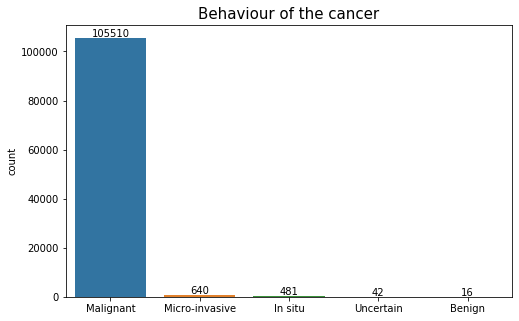

In [718]:
ax = sns.countplot(data = df, x = 'BEHAVIOUR_ICD10_O2')
ax.set_title('Behaviour of the cancer', fontsize=15)
ax.set_xlabel('')
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2, height+500, height, ha="center")

In [719]:
df['BEHAVIOUR_ICD10_O2'] = df['BEHAVIOUR_ICD10_O2'].astype(str)
df['BEH_BENIGN'] = df.groupby('PATIENTID')['BEHAVIOUR_ICD10_O2'].transform(lambda patient: True if any('Benign' in tumour for tumour in patient) else False)
df['BEH_MALIG'] = df.groupby('PATIENTID')['BEHAVIOUR_ICD10_O2'].transform(lambda patient: True if any('Malignant' in tumour for tumour in patient) else False)
df['BEH_MICINV'] = df.groupby('PATIENTID')['BEHAVIOUR_ICD10_O2'].transform(lambda patient: True if any('Micro-invasive' in tumour for tumour in patient) else False)
df['BEH_INSITU'] = df.groupby('PATIENTID')['BEHAVIOUR_ICD10_O2'].transform(lambda patient: True if any('In situ' in tumour for tumour in patient) else False)
df['BEH_UNCERT'] = df.groupby('PATIENTID')['BEHAVIOUR_ICD10_O2'].transform(lambda patient: True if any('Uncertain' in tumour for tumour in patient) else False)
df.head()

,PATIENTID,SEX,LINKNUMBER,ETHNICITY,NEWVITALSTATUS,VITALSTATUSDATE,TUMOURID,DIAGNOSISDATEBEST,SITE_ICD10_O2_3CHAR,BEHAVIOUR_ICD10_O2,T_BEST,N_BEST,M_BEST,STAGE_BEST,GRADE,AGE,CREG_CODE,ER_STATUS,PR_STATUS,HER2_STATUS,CANCERCAREPLANINTENT,PERFORMANCESTATUS,ACE27,DATE_FIRST_SURGERY,LATERALITY,QUINTILE_2015,NUMBER_TUMOURS,SC500,SC501,SC502,SC503,SC504,SC505,SC506,SC508,BEH_BENIGN,BEH_MALIG,BEH_MICINV,BEH_INSITU,BEH_UNCERT
277,10000752,F,810000752,White British,A,2017-01-16,10335805,2015-11-11,C50,Malignant,NaN,0,NaN,?,G2,68,L0801,NaN,NaN,NaN,NaN,NaN,NaN,2016-09-18,L,1 - least deprived,1,False,False,False,False,True,False,False,False,False,True,False,False,False
383,10001050,F,810001050,White British,A,2017-01-16,10335823,2015-10-24,C50,Malignant,NaN,3,1,4C,G3,86,L0401,NaN,NaN,NaN,Z,NaN,NaN,2015-12-15,L,4,1,False,False,False,False,False,False,False,False,False,True,False,False,False
709,10001824,F,810001824,Other ethnic group,A,2017-01-17,10335879,2015-03-15,C50,Malignant,2b,NaN,0,3A,G2,87,L0801,NaN,NaN,NaN,C,1,NaN,2015-03-15,L,4,1,False,False,False,False,False,False,False,False,False,True,False,False,False
795,10002078,F,810002078,NaN,A,2017-01-14,10335895,2015-06-10,C50,Malignant,4,0,0,3A,G2,72,L1701,NaN,NaN,NaN,NaN,NaN,NaN,2015-07-25,L,1 - least deprived,1,False,False,False,False,False,False,False,False,False,True,False,False,False
1301,10003284,F,810003284,NaN,A,2017-01-16,10335978,2014-10-10,C50,Malignant,2,0,0,2B,G3,80,L0801,NaN,NaN,NaN,C,NaN,NaN,2014-10-10,L,1 - least deprived,1,False,False,False,False,False,False,False,False,False,True,False,False,False


In [720]:
df[df['PATIENTID'] == 20005410]

,PATIENTID,SEX,LINKNUMBER,ETHNICITY,NEWVITALSTATUS,VITALSTATUSDATE,TUMOURID,DIAGNOSISDATEBEST,SITE_ICD10_O2_3CHAR,BEHAVIOUR_ICD10_O2,T_BEST,N_BEST,M_BEST,STAGE_BEST,GRADE,AGE,CREG_CODE,ER_STATUS,PR_STATUS,HER2_STATUS,CANCERCAREPLANINTENT,PERFORMANCESTATUS,ACE27,DATE_FIRST_SURGERY,LATERALITY,QUINTILE_2015,NUMBER_TUMOURS,SC500,SC501,SC502,SC503,SC504,SC505,SC506,SC508,BEH_BENIGN,BEH_MALIG,BEH_MICINV,BEH_INSITU,BEH_UNCERT
138597,20005410,F,820005410,White British,A,2017-01-16,20005410,2013-12-04,C50,Malignant,2,2a,0,3A,G2,50,L1201,NaN,NaN,NaN,C,NaN,NaN,2014-02-08,R,2,2,False,False,False,False,False,False,False,False,True,True,False,False,False
138598,20005410,F,820005410,White British,A,2017-01-16,20128840,2014-05-08,C50,Benign,2,NaN,NaN,U,GX,50,L1201,NaN,NaN,NaN,C,NaN,NaN,2014-05-10,L,2,2,False,False,False,False,False,False,False,False,True,True,False,False,False


In [721]:
df = df.drop(['BEHAVIOUR_ICD10_O2'], axis = 1)

In [722]:
df['T_BEST'].value_counts()

2      35559
1c     29120
1b     11071
1       7898
3       5413
1a      3295
4       1240
4b       939
1mi      618
4d       403
2a       354
is       233
a        153
4a       139
4c       137
0         83
2b        68
3a        66
1d        35
2c        23
3b        17
1a1       12
3c         9
X          5
1a2        5
T2         4
1b2        4
1b1        3
2a2        2
3d         2
T1         1
2A         1
2d         1
1C         1
Name: T_BEST, dtype: int64

In [723]:
df['T_BEST'] = df['T_BEST'].astype('str')
def T_best(value):
    if value.startswith('0'):
        return '0'
    elif value.startswith('1') or value == 'T1':
        return '1'
    elif value.startswith('2') or value == 'T2':
        return '2'
    elif value.startswith('3'):
        return '3'
    elif value.startswith('4'):
        return '4'
    elif value == 'X' or value == 'IS' or value == 'is' or value == 'a' or value == 'nan':
        return np.nan
    else:
        return value

df['T_BEST'] = df['T_BEST'].apply(T_best)
df['T_BEST'].value_counts()

1    52063
2    36012
3     5507
4     2858
0       83
Name: T_BEST, dtype: int64

In [724]:
contingency = pd.crosstab(df['NEWVITALSTATUS'], df['T_BEST'])
contingency

T_BEST,0,1,2,3,4
NEWVITALSTATUS,,,,,
A,83,51801,35635,5408,2741
D,0,262,377,99,117


In [725]:
chi2_stat, p_val, dof, expected = chi2_contingency(contingency)
print(p_val)

9.92115505003375e-104


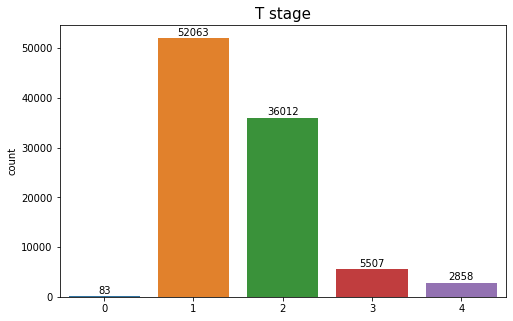

In [726]:
ax = sns.countplot(data = df, x = 'T_BEST', order = ['0', '1', '2', '3', '4'])
ax.set_title('T stage', fontsize=15)
ax.set_xlabel('')
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2, height+500, height, ha="center")

In [727]:
df['T_BEST'] = df['T_BEST'].astype(str)
df['T0'] = df.groupby('PATIENTID')['T_BEST'].transform(lambda patient: True if any('0' in tumour for tumour in patient) else False)
df['T1'] = df.groupby('PATIENTID')['T_BEST'].transform(lambda patient: True if any('1' in tumour for tumour in patient) else False)
df['T2'] = df.groupby('PATIENTID')['T_BEST'].transform(lambda patient: True if any('2' in tumour for tumour in patient) else False)
df['T3'] = df.groupby('PATIENTID')['T_BEST'].transform(lambda patient: True if any('3' in tumour for tumour in patient) else False)
df['T4'] = df.groupby('PATIENTID')['T_BEST'].transform(lambda patient: True if any('4' in tumour for tumour in patient) else False)
df.head()

,PATIENTID,SEX,LINKNUMBER,ETHNICITY,NEWVITALSTATUS,VITALSTATUSDATE,TUMOURID,DIAGNOSISDATEBEST,SITE_ICD10_O2_3CHAR,T_BEST,N_BEST,M_BEST,STAGE_BEST,GRADE,AGE,CREG_CODE,ER_STATUS,PR_STATUS,HER2_STATUS,CANCERCAREPLANINTENT,PERFORMANCESTATUS,ACE27,DATE_FIRST_SURGERY,LATERALITY,QUINTILE_2015,NUMBER_TUMOURS,SC500,SC501,SC502,SC503,SC504,SC505,SC506,SC508,BEH_BENIGN,BEH_MALIG,BEH_MICINV,BEH_INSITU,BEH_UNCERT,T0,T1,T2,T3,T4
277,10000752,F,810000752,White British,A,2017-01-16,10335805,2015-11-11,C50,nan,0,NaN,?,G2,68,L0801,NaN,NaN,NaN,NaN,NaN,NaN,2016-09-18,L,1 - least deprived,1,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False
383,10001050,F,810001050,White British,A,2017-01-16,10335823,2015-10-24,C50,nan,3,1,4C,G3,86,L0401,NaN,NaN,NaN,Z,NaN,NaN,2015-12-15,L,4,1,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False
709,10001824,F,810001824,Other ethnic group,A,2017-01-17,10335879,2015-03-15,C50,2,NaN,0,3A,G2,87,L0801,NaN,NaN,NaN,C,1,NaN,2015-03-15,L,4,1,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False
795,10002078,F,810002078,NaN,A,2017-01-14,10335895,2015-06-10,C50,4,0,0,3A,G2,72,L1701,NaN,NaN,NaN,NaN,NaN,NaN,2015-07-25,L,1 - least deprived,1,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True
1301,10003284,F,810003284,NaN,A,2017-01-16,10335978,2014-10-10,C50,2,0,0,2B,G3,80,L0801,NaN,NaN,NaN,C,NaN,NaN,2014-10-10,L,1 - least deprived,1,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False


In [728]:
df[df['PATIENTID'] == 20010794]

,PATIENTID,SEX,LINKNUMBER,ETHNICITY,NEWVITALSTATUS,VITALSTATUSDATE,TUMOURID,DIAGNOSISDATEBEST,SITE_ICD10_O2_3CHAR,T_BEST,N_BEST,M_BEST,STAGE_BEST,GRADE,AGE,CREG_CODE,ER_STATUS,PR_STATUS,HER2_STATUS,CANCERCAREPLANINTENT,PERFORMANCESTATUS,ACE27,DATE_FIRST_SURGERY,LATERALITY,QUINTILE_2015,NUMBER_TUMOURS,SC500,SC501,SC502,SC503,SC504,SC505,SC506,SC508,BEH_BENIGN,BEH_MALIG,BEH_MICINV,BEH_INSITU,BEH_UNCERT,T0,T1,T2,T3,T4
142983,20010794,F,820010794,Other white background,A,2017-01-17,20010794,2014-04-29,C50,1,0,NaN,1A,G2,62,L0901,P,P,Pm,C,NaN,NaN,2014-06-11,L,1 - least deprived,3,False,True,False,False,False,True,False,False,False,True,False,False,False,False,True,False,False,False
142984,20010794,F,820010794,Other white background,A,2017-01-17,20129134,2014-06-08,C50,1,0,NaN,1A,G2,62,L0901,P,NaN,B,NaN,9,NaN,2014-07-20,R,1 - least deprived,3,False,True,False,False,False,True,False,False,False,True,False,False,False,False,True,False,False,False
142985,20010794,F,820010794,Other white background,A,2017-01-17,20136414,2014-06-13,C50,nan,NaN,NaN,?,G2,62,L0901,P,P,NaN,C,1,1,NaN,L,1 - least deprived,3,False,True,False,False,False,True,False,False,False,True,False,False,False,False,True,False,False,False


In [729]:
df = df.drop(['T_BEST'], axis = 1)

In [730]:
df['N_BEST'].value_counts()

0      64475
1      15668
1a      5457
1mi     2693
2       2613
2a      1765
3       1086
3a       889
1b       139
1c       117
3c        85
3b        61
2b        37
X          6
2c         6
N0         1
Name: N_BEST, dtype: int64

In [731]:
df['N_BEST'] = df['N_BEST'].astype('str')
def N_best(value):
    if value.startswith('0') or value == 'N0':
        return '0'
    elif value.startswith('1'):
        return '1'
    elif value.startswith('2'):
        return '2'
    elif value.startswith('3'):
        return '3'
    elif value == 'X' or value == 'nan':
        return np.nan
    else:
        return value

df['N_BEST'] = df['N_BEST'].apply(N_best)
df['N_BEST'].value_counts()

0    64476
1    24074
2     4421
3     2121
Name: N_BEST, dtype: int64

In [732]:
contingency = pd.crosstab(df['NEWVITALSTATUS'], df['N_BEST'])
contingency

N_BEST,0,1,2,3
NEWVITALSTATUS,,,,
A,64102,23763,4354,2054
D,374,311,67,67


In [733]:
chi2_stat, p_val, dof, expected = chi2_contingency(contingency)
print(p_val)

3.2396902133981467e-57


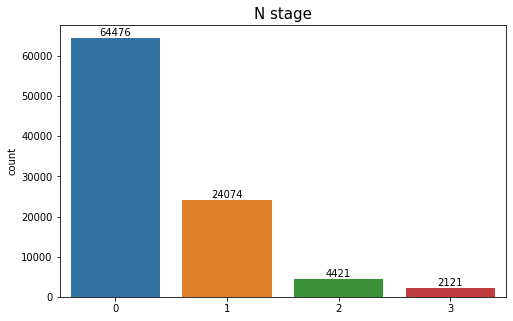

In [734]:
ax = sns.countplot(data = df, x = 'N_BEST', order = ['0', '1', '2', '3'])
ax.set_title('N stage', fontsize=15)
ax.set_xlabel('')
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2, height+500, height, ha="center")

In [735]:
df['N_BEST'] = df['N_BEST'].astype(str)
df['N0'] = df.groupby('PATIENTID')['N_BEST'].transform(lambda patient: True if any('0' in tumour for tumour in patient) else False)
df['N1'] = df.groupby('PATIENTID')['N_BEST'].transform(lambda patient: True if any('1' in tumour for tumour in patient) else False)
df['N2'] = df.groupby('PATIENTID')['N_BEST'].transform(lambda patient: True if any('2' in tumour for tumour in patient) else False)
df['N3'] = df.groupby('PATIENTID')['N_BEST'].transform(lambda patient: True if any('3' in tumour for tumour in patient) else False)
df.head()

,PATIENTID,SEX,LINKNUMBER,ETHNICITY,NEWVITALSTATUS,VITALSTATUSDATE,TUMOURID,DIAGNOSISDATEBEST,SITE_ICD10_O2_3CHAR,N_BEST,M_BEST,STAGE_BEST,GRADE,AGE,CREG_CODE,ER_STATUS,PR_STATUS,HER2_STATUS,CANCERCAREPLANINTENT,PERFORMANCESTATUS,ACE27,DATE_FIRST_SURGERY,LATERALITY,QUINTILE_2015,NUMBER_TUMOURS,SC500,SC501,SC502,SC503,SC504,SC505,SC506,SC508,BEH_BENIGN,BEH_MALIG,BEH_MICINV,BEH_INSITU,BEH_UNCERT,T0,T1,T2,T3,T4,N0,N1,N2,N3
277,10000752,F,810000752,White British,A,2017-01-16,10335805,2015-11-11,C50,0,NaN,?,G2,68,L0801,NaN,NaN,NaN,NaN,NaN,NaN,2016-09-18,L,1 - least deprived,1,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False
383,10001050,F,810001050,White British,A,2017-01-16,10335823,2015-10-24,C50,3,1,4C,G3,86,L0401,NaN,NaN,NaN,Z,NaN,NaN,2015-12-15,L,4,1,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True
709,10001824,F,810001824,Other ethnic group,A,2017-01-17,10335879,2015-03-15,C50,nan,0,3A,G2,87,L0801,NaN,NaN,NaN,C,1,NaN,2015-03-15,L,4,1,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False
795,10002078,F,810002078,NaN,A,2017-01-14,10335895,2015-06-10,C50,0,0,3A,G2,72,L1701,NaN,NaN,NaN,NaN,NaN,NaN,2015-07-25,L,1 - least deprived,1,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,True,False,False,False
1301,10003284,F,810003284,NaN,A,2017-01-16,10335978,2014-10-10,C50,0,0,2B,G3,80,L0801,NaN,NaN,NaN,C,NaN,NaN,2014-10-10,L,1 - least deprived,1,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,True,False,False,False


In [736]:
df[df['PATIENTID'] == 20010794]

,PATIENTID,SEX,LINKNUMBER,ETHNICITY,NEWVITALSTATUS,VITALSTATUSDATE,TUMOURID,DIAGNOSISDATEBEST,SITE_ICD10_O2_3CHAR,N_BEST,M_BEST,STAGE_BEST,GRADE,AGE,CREG_CODE,ER_STATUS,PR_STATUS,HER2_STATUS,CANCERCAREPLANINTENT,PERFORMANCESTATUS,ACE27,DATE_FIRST_SURGERY,LATERALITY,QUINTILE_2015,NUMBER_TUMOURS,SC500,SC501,SC502,SC503,SC504,SC505,SC506,SC508,BEH_BENIGN,BEH_MALIG,BEH_MICINV,BEH_INSITU,BEH_UNCERT,T0,T1,T2,T3,T4,N0,N1,N2,N3
142983,20010794,F,820010794,Other white background,A,2017-01-17,20010794,2014-04-29,C50,0,NaN,1A,G2,62,L0901,P,P,Pm,C,NaN,NaN,2014-06-11,L,1 - least deprived,3,False,True,False,False,False,True,False,False,False,True,False,False,False,False,True,False,False,False,True,False,False,False
142984,20010794,F,820010794,Other white background,A,2017-01-17,20129134,2014-06-08,C50,0,NaN,1A,G2,62,L0901,P,NaN,B,NaN,9,NaN,2014-07-20,R,1 - least deprived,3,False,True,False,False,False,True,False,False,False,True,False,False,False,False,True,False,False,False,True,False,False,False
142985,20010794,F,820010794,Other white background,A,2017-01-17,20136414,2014-06-13,C50,nan,NaN,?,G2,62,L0901,P,P,NaN,C,1,1,NaN,L,1 - least deprived,3,False,True,False,False,False,True,False,False,False,True,False,False,False,False,True,False,False,False,True,False,False,False


In [737]:
df = df.drop(['N_BEST'], axis = 1)

In [738]:
df['M_BEST'].value_counts()

0     59666
1      3151
1b       90
1a       32
X        28
1c        2
Name: M_BEST, dtype: int64

In [739]:
df['M_BEST'] = df['M_BEST'].astype('str')
def M_best(value):
    if value.startswith('0'):
        return '0'
    elif value.startswith('1'):
        return '1'
    elif value == 'X' or value == 'nan':
        return np.nan
    else:
        return value

df['M_BEST'] = df['M_BEST'].apply(M_best)
df['M_BEST'].value_counts()

0    59666
1     3275
Name: M_BEST, dtype: int64

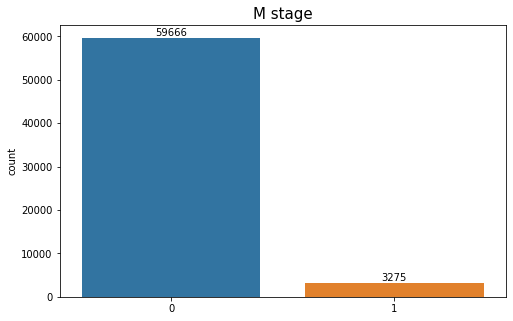

In [740]:
ax = sns.countplot(data = df, x = 'M_BEST', order = ['0', '1'])
ax.set_title('M stage', fontsize=15)
ax.set_xlabel('')
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2, height+500, height, ha="center")

In [741]:
contingency = pd.crosstab(df['NEWVITALSTATUS'], df['M_BEST'])
contingency

M_BEST,0,1
NEWVITALSTATUS,,
A,59222,2995
D,444,280


In [742]:
chi2_stat, p_val, dof, expected = chi2_contingency(contingency)
print(p_val)

0.0


In [743]:
df['M_BEST'] = df['M_BEST'].astype(str)
df['M1'] = df.groupby('PATIENTID')['M_BEST'].transform(lambda patient: True if any('1' in tumour for tumour in patient) else False)
df.head()

,PATIENTID,SEX,LINKNUMBER,ETHNICITY,NEWVITALSTATUS,VITALSTATUSDATE,TUMOURID,DIAGNOSISDATEBEST,SITE_ICD10_O2_3CHAR,M_BEST,STAGE_BEST,GRADE,AGE,CREG_CODE,ER_STATUS,PR_STATUS,HER2_STATUS,CANCERCAREPLANINTENT,PERFORMANCESTATUS,ACE27,DATE_FIRST_SURGERY,LATERALITY,QUINTILE_2015,NUMBER_TUMOURS,SC500,SC501,SC502,SC503,SC504,SC505,SC506,SC508,BEH_BENIGN,BEH_MALIG,BEH_MICINV,BEH_INSITU,BEH_UNCERT,T0,T1,T2,T3,T4,N0,N1,N2,N3,M1
277,10000752,F,810000752,White British,A,2017-01-16,10335805,2015-11-11,C50,nan,?,G2,68,L0801,NaN,NaN,NaN,NaN,NaN,NaN,2016-09-18,L,1 - least deprived,1,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False
383,10001050,F,810001050,White British,A,2017-01-16,10335823,2015-10-24,C50,1,4C,G3,86,L0401,NaN,NaN,NaN,Z,NaN,NaN,2015-12-15,L,4,1,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,True
709,10001824,F,810001824,Other ethnic group,A,2017-01-17,10335879,2015-03-15,C50,0,3A,G2,87,L0801,NaN,NaN,NaN,C,1,NaN,2015-03-15,L,4,1,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False
795,10002078,F,810002078,NaN,A,2017-01-14,10335895,2015-06-10,C50,0,3A,G2,72,L1701,NaN,NaN,NaN,NaN,NaN,NaN,2015-07-25,L,1 - least deprived,1,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,True,False,False,False,False
1301,10003284,F,810003284,NaN,A,2017-01-16,10335978,2014-10-10,C50,0,2B,G3,80,L0801,NaN,NaN,NaN,C,NaN,NaN,2014-10-10,L,1 - least deprived,1,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,True,False,False,False,False


In [744]:
df = df.drop(['M_BEST'], axis = 1)

In [745]:
df['STAGE_BEST'].value_counts()

1A     41099
2A     26463
2B     12401
?       9879
3A      5315
4       3408
1B      1788
3C      1694
3B      1617
1        954
0        940
U        509
2        355
3        185
4B        28
1C        27
4S        19
1A1       18
2C        13
2A2       11
4A        10
4C         9
1A2        4
2A1        3
0A         3
3S         3
1B1        2
1B2        1
2E         1
1E         1
Name: STAGE_BEST, dtype: int64

In [746]:
df['STAGE_BEST'] = df['STAGE_BEST'].astype(str)
def stage_best(value):
    if value.startswith('0'):
        return 'Stage 0'
    elif value.startswith('1'):
        return 'Stage 1'
    elif value.startswith('2'):
        return 'Stage 2'
    elif value.startswith('3'):
        return 'Stage 3'
    elif value.startswith('4'):
        return 'Stage 4'
    elif value == '?' or value == 'U' or value == 'nan':
        return np.nan
    else:
        return value

df['STAGE_BEST'] = df['STAGE_BEST'].apply(stage_best)
df['STAGE_BEST'].value_counts()

Stage 1    43894
Stage 2    39247
Stage 3     8814
Stage 4     3474
Stage 0      943
Name: STAGE_BEST, dtype: int64

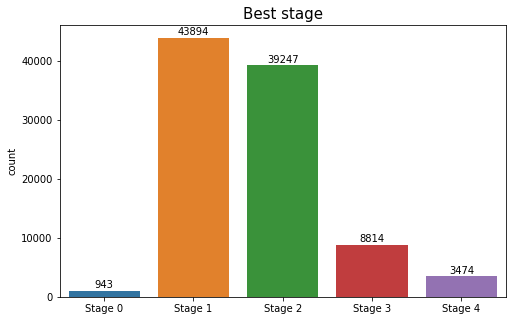

In [747]:
ax = sns.countplot(data = df, x = 'STAGE_BEST', order = ['Stage 0', 'Stage 1', 'Stage 2', 'Stage 3', 'Stage 4'])
ax.set_title('Best stage', fontsize=15)
ax.set_xlabel('')
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2, height+500, height, ha='center')

In [748]:
contingency = pd.crosstab(df['NEWVITALSTATUS'], df['STAGE_BEST'])
contingency

STAGE_BEST,Stage 0,Stage 1,Stage 2,Stage 3,Stage 4
NEWVITALSTATUS,,,,,
A,935,43741,38931,8669,3177
D,8,153,316,145,297


In [749]:
chi2_stat, p_val, dof, expected = chi2_contingency(contingency)
print(p_val)

0.0


In [750]:
df['STAGE_BEST'] = df['STAGE_BEST'].astype(str)
df['STAGE0'] = df.groupby('PATIENTID')['STAGE_BEST'].transform(lambda patient: True if any('Stage 0' in tumour for tumour in patient) else False)
df['STAGE1'] = df.groupby('PATIENTID')['STAGE_BEST'].transform(lambda patient: True if any('Stage 1' in tumour for tumour in patient) else False)
df['STAGE2'] = df.groupby('PATIENTID')['STAGE_BEST'].transform(lambda patient: True if any('Stage 2' in tumour for tumour in patient) else False)
df['STAGE3'] = df.groupby('PATIENTID')['STAGE_BEST'].transform(lambda patient: True if any('Stage 3' in tumour for tumour in patient) else False)
df['STAGE4'] = df.groupby('PATIENTID')['STAGE_BEST'].transform(lambda patient: True if any('Stage 4' in tumour for tumour in patient) else False)
df.head()

,PATIENTID,SEX,LINKNUMBER,ETHNICITY,NEWVITALSTATUS,VITALSTATUSDATE,TUMOURID,DIAGNOSISDATEBEST,SITE_ICD10_O2_3CHAR,STAGE_BEST,GRADE,AGE,CREG_CODE,ER_STATUS,PR_STATUS,HER2_STATUS,CANCERCAREPLANINTENT,PERFORMANCESTATUS,ACE27,DATE_FIRST_SURGERY,LATERALITY,QUINTILE_2015,NUMBER_TUMOURS,SC500,SC501,SC502,SC503,SC504,SC505,SC506,SC508,BEH_BENIGN,BEH_MALIG,BEH_MICINV,BEH_INSITU,BEH_UNCERT,T0,T1,T2,T3,T4,N0,N1,N2,N3,M1,STAGE0,STAGE1,STAGE2,STAGE3,STAGE4
277,10000752,F,810000752,White British,A,2017-01-16,10335805,2015-11-11,C50,nan,G2,68,L0801,NaN,NaN,NaN,NaN,NaN,NaN,2016-09-18,L,1 - least deprived,1,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False
383,10001050,F,810001050,White British,A,2017-01-16,10335823,2015-10-24,C50,Stage 4,G3,86,L0401,NaN,NaN,NaN,Z,NaN,NaN,2015-12-15,L,4,1,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False,False,False,True
709,10001824,F,810001824,Other ethnic group,A,2017-01-17,10335879,2015-03-15,C50,Stage 3,G2,87,L0801,NaN,NaN,NaN,C,1,NaN,2015-03-15,L,4,1,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False
795,10002078,F,810002078,NaN,A,2017-01-14,10335895,2015-06-10,C50,Stage 3,G2,72,L1701,NaN,NaN,NaN,NaN,NaN,NaN,2015-07-25,L,1 - least deprived,1,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,False,True,False
1301,10003284,F,810003284,NaN,A,2017-01-16,10335978,2014-10-10,C50,Stage 2,G3,80,L0801,NaN,NaN,NaN,C,NaN,NaN,2014-10-10,L,1 - least deprived,1,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,True,False,False,False,False,False,False,True,False,False


In [751]:
df[df['PATIENTID'] == 20012119]

,PATIENTID,SEX,LINKNUMBER,ETHNICITY,NEWVITALSTATUS,VITALSTATUSDATE,TUMOURID,DIAGNOSISDATEBEST,SITE_ICD10_O2_3CHAR,STAGE_BEST,GRADE,AGE,CREG_CODE,ER_STATUS,PR_STATUS,HER2_STATUS,CANCERCAREPLANINTENT,PERFORMANCESTATUS,ACE27,DATE_FIRST_SURGERY,LATERALITY,QUINTILE_2015,NUMBER_TUMOURS,SC500,SC501,SC502,SC503,SC504,SC505,SC506,SC508,BEH_BENIGN,BEH_MALIG,BEH_MICINV,BEH_INSITU,BEH_UNCERT,T0,T1,T2,T3,T4,N0,N1,N2,N3,M1,STAGE0,STAGE1,STAGE2,STAGE3,STAGE4
144060,20012119,F,820012119,Other white background,A,2017-01-16,20012119,2015-01-29,C50,Stage 4,G2,76,L0801,NaN,NaN,NaN,NaN,NaN,NaN,2015-04-14,L,5 - most deprived,3,False,False,False,False,False,False,False,True,False,True,False,False,False,False,False,False,True,False,False,False,True,False,True,False,False,True,False,True
144061,20012119,F,820012119,Other white background,A,2017-01-16,20129217,2015-12-31,C50,nan,G2,76,L0801,P,NaN,N,NaN,NaN,NaN,2016-03-10,L,5 - most deprived,3,False,False,False,False,False,False,False,True,False,True,False,False,False,False,False,False,True,False,False,False,True,False,True,False,False,True,False,True
144062,20012119,F,820012119,Other white background,A,2017-01-16,20136418,2015-12-31,C50,Stage 2,G1,76,L0801,P,P,N,NaN,NaN,NaN,2016-03-15,L,5 - most deprived,3,False,False,False,False,False,False,False,True,False,True,False,False,False,False,False,False,True,False,False,False,True,False,True,False,False,True,False,True


In [752]:
df = df.drop(['STAGE_BEST'], axis = 1)

In [753]:
df['GRADE'].value_counts()

G2    53264
G3    31237
G1    15570
GX     5947
G4       56
Name: GRADE, dtype: int64

In [754]:
df['GRADE'] = df['GRADE'].astype(str)
def grade(value):
    if value == 'GX' or value == 'nan':
        return np.nan
    else:
        return value

df['GRADE'] = df['GRADE'].apply(grade)
df['GRADE'].value_counts()

G2    53264
G3    31237
G1    15570
G4       56
Name: GRADE, dtype: int64

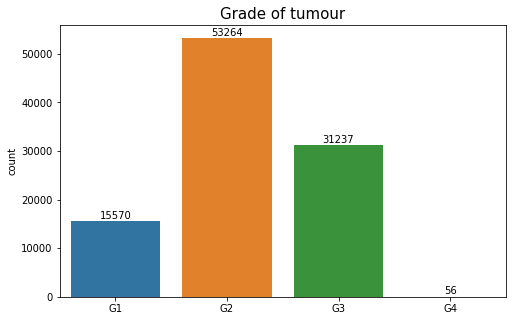

In [755]:
ax = sns.countplot(data = df, x = 'GRADE', order = ['G1', 'G2', 'G3', 'G4'])
ax.set_title('Grade of tumour', fontsize=15)
ax.set_xlabel('')
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2, height+500, height, ha='center')

In [756]:
contingency = pd.crosstab(df['NEWVITALSTATUS'], df['GRADE'])
contingency

GRADE,G1,G2,G3,G4
NEWVITALSTATUS,,,,
A,15373,52644,30845,56
D,197,620,392,0


In [757]:
chi2_stat, p_val, dof, expected = chi2_contingency(contingency)
print(p_val)

0.46576574940428184


In [758]:
df['GRADE'] = df['GRADE'].astype(str)
df['GRADE1'] = df.groupby('PATIENTID')['GRADE'].transform(lambda patient: True if any('G1' in tumour for tumour in patient) else False)
df['GRADE2'] = df.groupby('PATIENTID')['GRADE'].transform(lambda patient: True if any('G2' in tumour for tumour in patient) else False)
df['GRADE3'] = df.groupby('PATIENTID')['GRADE'].transform(lambda patient: True if any('G3' in tumour for tumour in patient) else False)
df['GRADE4'] = df.groupby('PATIENTID')['GRADE'].transform(lambda patient: True if any('G4' in tumour for tumour in patient) else False)
df.head()

,PATIENTID,SEX,LINKNUMBER,ETHNICITY,NEWVITALSTATUS,VITALSTATUSDATE,TUMOURID,DIAGNOSISDATEBEST,SITE_ICD10_O2_3CHAR,GRADE,AGE,CREG_CODE,ER_STATUS,PR_STATUS,HER2_STATUS,CANCERCAREPLANINTENT,PERFORMANCESTATUS,ACE27,DATE_FIRST_SURGERY,LATERALITY,QUINTILE_2015,NUMBER_TUMOURS,SC500,SC501,SC502,SC503,SC504,SC505,SC506,SC508,BEH_BENIGN,BEH_MALIG,BEH_MICINV,BEH_INSITU,BEH_UNCERT,T0,T1,T2,T3,T4,N0,N1,N2,N3,M1,STAGE0,STAGE1,STAGE2,STAGE3,STAGE4,GRADE1,GRADE2,GRADE3,GRADE4
277,10000752,F,810000752,White British,A,2017-01-16,10335805,2015-11-11,C50,G2,68,L0801,NaN,NaN,NaN,NaN,NaN,NaN,2016-09-18,L,1 - least deprived,1,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False
383,10001050,F,810001050,White British,A,2017-01-16,10335823,2015-10-24,C50,G3,86,L0401,NaN,NaN,NaN,Z,NaN,NaN,2015-12-15,L,4,1,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False,False,False,True,False,False,True,False
709,10001824,F,810001824,Other ethnic group,A,2017-01-17,10335879,2015-03-15,C50,G2,87,L0801,NaN,NaN,NaN,C,1,NaN,2015-03-15,L,4,1,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,True,False,False
795,10002078,F,810002078,NaN,A,2017-01-14,10335895,2015-06-10,C50,G2,72,L1701,NaN,NaN,NaN,NaN,NaN,NaN,2015-07-25,L,1 - least deprived,1,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,False,True,False,False,True,False,False
1301,10003284,F,810003284,NaN,A,2017-01-16,10335978,2014-10-10,C50,G3,80,L0801,NaN,NaN,NaN,C,NaN,NaN,2014-10-10,L,1 - least deprived,1,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,True,False,False,False,False,False,False,True,False,False,False,False,True,False


In [759]:
df[df['PATIENTID'] == 20012119]

,PATIENTID,SEX,LINKNUMBER,ETHNICITY,NEWVITALSTATUS,VITALSTATUSDATE,TUMOURID,DIAGNOSISDATEBEST,SITE_ICD10_O2_3CHAR,GRADE,AGE,CREG_CODE,ER_STATUS,PR_STATUS,HER2_STATUS,CANCERCAREPLANINTENT,PERFORMANCESTATUS,ACE27,DATE_FIRST_SURGERY,LATERALITY,QUINTILE_2015,NUMBER_TUMOURS,SC500,SC501,SC502,SC503,SC504,SC505,SC506,SC508,BEH_BENIGN,BEH_MALIG,BEH_MICINV,BEH_INSITU,BEH_UNCERT,T0,T1,T2,T3,T4,N0,N1,N2,N3,M1,STAGE0,STAGE1,STAGE2,STAGE3,STAGE4,GRADE1,GRADE2,GRADE3,GRADE4
144060,20012119,F,820012119,Other white background,A,2017-01-16,20012119,2015-01-29,C50,G2,76,L0801,NaN,NaN,NaN,NaN,NaN,NaN,2015-04-14,L,5 - most deprived,3,False,False,False,False,False,False,False,True,False,True,False,False,False,False,False,False,True,False,False,False,True,False,True,False,False,True,False,True,True,True,False,False
144061,20012119,F,820012119,Other white background,A,2017-01-16,20129217,2015-12-31,C50,G2,76,L0801,P,NaN,N,NaN,NaN,NaN,2016-03-10,L,5 - most deprived,3,False,False,False,False,False,False,False,True,False,True,False,False,False,False,False,False,True,False,False,False,True,False,True,False,False,True,False,True,True,True,False,False
144062,20012119,F,820012119,Other white background,A,2017-01-16,20136418,2015-12-31,C50,G1,76,L0801,P,P,N,NaN,NaN,NaN,2016-03-15,L,5 - most deprived,3,False,False,False,False,False,False,False,True,False,True,False,False,False,False,False,False,True,False,False,False,True,False,True,False,False,True,False,True,True,True,False,False


In [760]:
df = df.drop(['GRADE'], axis = 1)

In [761]:
df['AGE'].describe()

count    106760.000000
mean         62.969511
std          14.319220
min           3.000000
25%          52.000000
50%          63.000000
75%          73.000000
max         105.000000
Name: AGE, dtype: float64

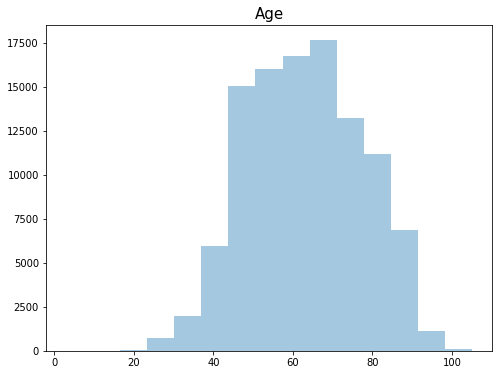

In [762]:
ax = sns.distplot(df['AGE'], hist = True, kde = False, bins = 15)
ax.set_title('Age', fontsize=15)
ax.set_xlabel('')
plt.gcf().set_size_inches(8,6)

In [763]:
df['AGE_MEAN'] = df.groupby('PATIENTID')['AGE'].transform(np.mean)
df.head()

,PATIENTID,SEX,LINKNUMBER,ETHNICITY,NEWVITALSTATUS,VITALSTATUSDATE,TUMOURID,DIAGNOSISDATEBEST,SITE_ICD10_O2_3CHAR,AGE,CREG_CODE,ER_STATUS,PR_STATUS,HER2_STATUS,CANCERCAREPLANINTENT,PERFORMANCESTATUS,ACE27,DATE_FIRST_SURGERY,LATERALITY,QUINTILE_2015,NUMBER_TUMOURS,SC500,SC501,SC502,SC503,SC504,SC505,SC506,SC508,BEH_BENIGN,BEH_MALIG,BEH_MICINV,BEH_INSITU,BEH_UNCERT,T0,T1,T2,T3,T4,N0,N1,N2,N3,M1,STAGE0,STAGE1,STAGE2,STAGE3,STAGE4,GRADE1,GRADE2,GRADE3,GRADE4,AGE_MEAN
277,10000752,F,810000752,White British,A,2017-01-16,10335805,2015-11-11,C50,68,L0801,NaN,NaN,NaN,NaN,NaN,NaN,2016-09-18,L,1 - least deprived,1,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,68.0
383,10001050,F,810001050,White British,A,2017-01-16,10335823,2015-10-24,C50,86,L0401,NaN,NaN,NaN,Z,NaN,NaN,2015-12-15,L,4,1,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False,False,False,True,False,False,True,False,86.0
709,10001824,F,810001824,Other ethnic group,A,2017-01-17,10335879,2015-03-15,C50,87,L0801,NaN,NaN,NaN,C,1,NaN,2015-03-15,L,4,1,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,True,False,False,87.0
795,10002078,F,810002078,NaN,A,2017-01-14,10335895,2015-06-10,C50,72,L1701,NaN,NaN,NaN,NaN,NaN,NaN,2015-07-25,L,1 - least deprived,1,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,False,True,False,False,True,False,False,72.0
1301,10003284,F,810003284,NaN,A,2017-01-16,10335978,2014-10-10,C50,80,L0801,NaN,NaN,NaN,C,NaN,NaN,2014-10-10,L,1 - least deprived,1,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,True,False,False,False,False,False,False,True,False,False,False,False,True,False,80.0


In [764]:
df = df.drop(['AGE'], axis = 1)

In [765]:
df['CREG_CODE'].value_counts()

L0801    22763
L1001    16707
L1701    13459
L0201    13456
L0401    12396
L1201    11323
L0301    10478
L0901     6178
Name: CREG_CODE, dtype: int64

In [766]:
def creg(value):
    if value == 'L0801':
        return 'L0801 Thames Cancer Registry'
    elif value == 'L0201':
        return 'L0201 Northern & Yorkshire Cancer Registry & Information Service'
    elif value == 'L0301':
        return 'L0301 Trent Cancer Registry'
    elif value == 'L1201':
        return 'L1201 West Midlands Cancer Intelligence Unit'
    elif value == 'L0401':
        return 'L0401 Eastern Cancer Registration & Information Centre'
    elif value == 'L1701':
        return 'L1701 North West Cancer Intelligence Service'
    elif value == 'L1001':
        return 'L1001 South West Cancer Intelligence Service'
    elif value == 'L1101':
        return 'L1101 Welsh Cancer Intelligence & Surveillance Unit'
    elif value == 'L0901':
        return 'L0901 Oxford Cancer Intelligence Unit'
    elif value == 'nan':
        return np.nan
    else:
        return value

df['CREG_CODE'] = df['CREG_CODE'].apply(creg)
df['CREG_CODE'].value_counts()

L0801 Thames Cancer Registry                                        22763
L1001 South West Cancer Intelligence Service                        16707
L1701 North West Cancer Intelligence Service                        13459
L0201 Northern & Yorkshire Cancer Registry & Information Service    13456
L0401 Eastern Cancer Registration & Information Centre              12396
L1201 West Midlands Cancer Intelligence Unit                        11323
L0301 Trent Cancer Registry                                         10478
L0901 Oxford Cancer Intelligence Unit                                6178
Name: CREG_CODE, dtype: int64

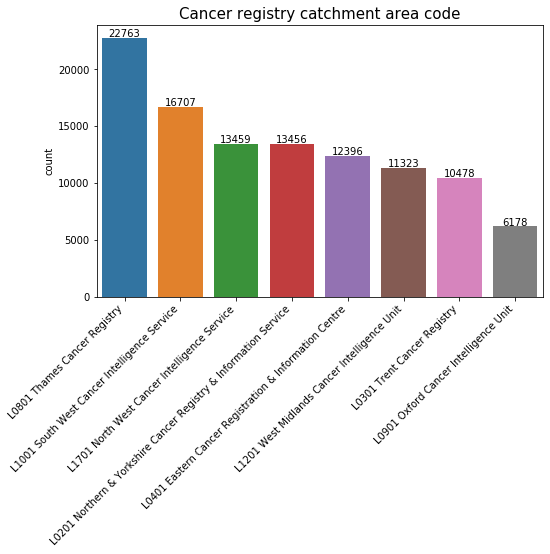

In [767]:
ax = sns.countplot(data = df, x = 'CREG_CODE', order=['L0801 Thames Cancer Registry',
                                                     'L1001 South West Cancer Intelligence Service',
                                                     'L1701 North West Cancer Intelligence Service',
                                                     'L0201 Northern & Yorkshire Cancer Registry & Information Service',
                                                     'L0401 Eastern Cancer Registration & Information Centre',
                                                     'L1201 West Midlands Cancer Intelligence Unit',                                                     
                                                     'L0301 Trent Cancer Registry',
                                                     'L0901 Oxford Cancer Intelligence Unit'])
ax.set_title('Cancer registry catchment area code', fontsize=15)
ax.set_xticklabels(ax.get_xticklabels(), rotation = 45, horizontalalignment = 'right')
ax.set_xlabel('')
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2, height+100, height, ha='center')

In [768]:
contingency = pd.crosstab(df['NEWVITALSTATUS'], df['CREG_CODE'])
contingency

CREG_CODE,L0201 Northern & Yorkshire Cancer Registry & Information Service,L0301 Trent Cancer Registry,L0401 Eastern Cancer Registration & Information Centre,L0801 Thames Cancer Registry,L0901 Oxford Cancer Intelligence Unit,L1001 South West Cancer Intelligence Service,L1201 West Midlands Cancer Intelligence Unit,L1701 North West Cancer Intelligence Service
NEWVITALSTATUS,,,,,,,,
A,13275,10357,12251,22488,6114,16492,11175,13299
D,181,121,145,275,64,215,148,160


In [769]:
chi2_stat, p_val, dof, expected = chi2_contingency(contingency)
print(p_val)

0.5965147989891413


In [770]:
df['L0801'] = df.groupby('PATIENTID')['CREG_CODE'].transform(lambda patient: True if any('L0801 Thames Cancer Registry' in tumour for tumour in patient) else False)
df['L1001'] = df.groupby('PATIENTID')['CREG_CODE'].transform(lambda patient: True if any('L1001 South West Cancer Intelligence Service' in tumour for tumour in patient) else False)
df['L1701'] = df.groupby('PATIENTID')['CREG_CODE'].transform(lambda patient: True if any('L1701 North West Cancer Intelligence Service' in tumour for tumour in patient) else False)
df['L0201'] = df.groupby('PATIENTID')['CREG_CODE'].transform(lambda patient: True if any('L0201 Northern & Yorkshire Cancer Registry & Information Service' in tumour for tumour in patient) else False)
df['L0401'] = df.groupby('PATIENTID')['CREG_CODE'].transform(lambda patient: True if any('L0401 Eastern Cancer Registration & Information Centre' in tumour for tumour in patient) else False)
df['L1201'] = df.groupby('PATIENTID')['CREG_CODE'].transform(lambda patient: True if any('L1201 West Midlands Cancer Intelligence Unit' in tumour for tumour in patient) else False)
df['L0301'] = df.groupby('PATIENTID')['CREG_CODE'].transform(lambda patient: True if any('L0301 Trent Cancer Registry' in tumour for tumour in patient) else False)
df['L0901'] = df.groupby('PATIENTID')['CREG_CODE'].transform(lambda patient: True if any('L0901 Oxford Cancer Intelligence Unit' in tumour for tumour in patient) else False)
df.head()

,PATIENTID,SEX,LINKNUMBER,ETHNICITY,NEWVITALSTATUS,VITALSTATUSDATE,TUMOURID,DIAGNOSISDATEBEST,SITE_ICD10_O2_3CHAR,CREG_CODE,ER_STATUS,PR_STATUS,HER2_STATUS,CANCERCAREPLANINTENT,PERFORMANCESTATUS,ACE27,DATE_FIRST_SURGERY,LATERALITY,QUINTILE_2015,NUMBER_TUMOURS,SC500,SC501,SC502,SC503,SC504,SC505,SC506,SC508,BEH_BENIGN,BEH_MALIG,BEH_MICINV,BEH_INSITU,BEH_UNCERT,T0,T1,T2,T3,T4,N0,N1,N2,N3,M1,STAGE0,STAGE1,STAGE2,STAGE3,STAGE4,GRADE1,GRADE2,GRADE3,GRADE4,AGE_MEAN,L0801,L1001,L1701,L0201,L0401,L1201,L0301,L0901
277,10000752,F,810000752,White British,A,2017-01-16,10335805,2015-11-11,C50,L0801 Thames Cancer Registry,NaN,NaN,NaN,NaN,NaN,NaN,2016-09-18,L,1 - least deprived,1,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,68.0,True,False,False,False,False,False,False,False
383,10001050,F,810001050,White British,A,2017-01-16,10335823,2015-10-24,C50,L0401 Eastern Cancer Registration & Informatio...,NaN,NaN,NaN,Z,NaN,NaN,2015-12-15,L,4,1,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False,False,False,True,False,False,True,False,86.0,False,False,False,False,True,False,False,False
709,10001824,F,810001824,Other ethnic group,A,2017-01-17,10335879,2015-03-15,C50,L0801 Thames Cancer Registry,NaN,NaN,NaN,C,1,NaN,2015-03-15,L,4,1,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,True,False,False,87.0,True,False,False,False,False,False,False,False
795,10002078,F,810002078,NaN,A,2017-01-14,10335895,2015-06-10,C50,L1701 North West Cancer Intelligence Service,NaN,NaN,NaN,NaN,NaN,NaN,2015-07-25,L,1 - least deprived,1,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,False,True,False,False,True,False,False,72.0,False,False,True,False,False,False,False,False
1301,10003284,F,810003284,NaN,A,2017-01-16,10335978,2014-10-10,C50,L0801 Thames Cancer Registry,NaN,NaN,NaN,C,NaN,NaN,2014-10-10,L,1 - least deprived,1,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,True,False,False,False,False,False,False,True,False,False,False,False,True,False,80.0,True,False,False,False,False,False,False,False


In [771]:
df = df.drop(['CREG_CODE'], axis = 1)

In [772]:
df['ER_STATUS'].value_counts()

P     69311
N     12011
U      9378
Pm      349
X       123
B        60
Name: ER_STATUS, dtype: int64

In [773]:
df['ER_STATUS'] = df['ER_STATUS'].astype(str)
def er_status(value):
    if value.startswith('P'):
        return 'Positive'
    elif value.startswith('N'):
        return 'Negative'    
    elif value == 'U' or value == 'X' or value == 'B' or value == 'nan':
        return np.nan        
    else:
        return value

df['ER_STATUS'] = df['ER_STATUS'].apply(er_status)
df['ER_STATUS'].value_counts()

Positive    69660
Negative    12011
Name: ER_STATUS, dtype: int64

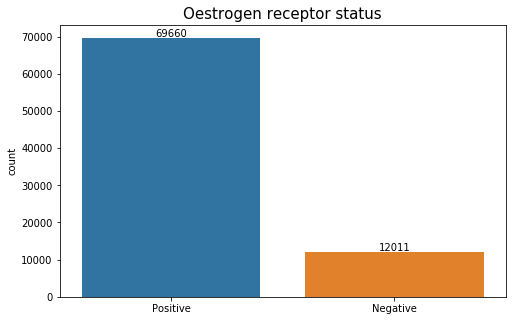

In [774]:
ax = sns.countplot(data = df, x = 'ER_STATUS')
ax.set_title('Oestrogen receptor status', fontsize=15)
ax.set_xlabel('')
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2, height+300, height, ha='center')

In [775]:
contingency = pd.crosstab(df['NEWVITALSTATUS'], df['ER_STATUS'])
contingency

ER_STATUS,Negative,Positive
NEWVITALSTATUS,,
A,11875,68834
D,136,826


In [776]:
chi2_stat, p_val, dof, expected = chi2_contingency(contingency)
print(p_val)

0.6485487647749113


In [777]:
df['ER_STATUS'] = df['ER_STATUS'].astype(str)
df['ER_POS'] = df.groupby('PATIENTID')['ER_STATUS'].transform(lambda patient: True if any('Positive' in tumour for tumour in patient) else False)
df.head()

,PATIENTID,SEX,LINKNUMBER,ETHNICITY,NEWVITALSTATUS,VITALSTATUSDATE,TUMOURID,DIAGNOSISDATEBEST,SITE_ICD10_O2_3CHAR,ER_STATUS,PR_STATUS,HER2_STATUS,CANCERCAREPLANINTENT,PERFORMANCESTATUS,ACE27,DATE_FIRST_SURGERY,LATERALITY,QUINTILE_2015,NUMBER_TUMOURS,SC500,SC501,SC502,SC503,SC504,SC505,SC506,SC508,BEH_BENIGN,BEH_MALIG,BEH_MICINV,BEH_INSITU,BEH_UNCERT,T0,T1,T2,T3,T4,N0,N1,N2,N3,M1,STAGE0,STAGE1,STAGE2,STAGE3,STAGE4,GRADE1,GRADE2,GRADE3,GRADE4,AGE_MEAN,L0801,L1001,L1701,L0201,L0401,L1201,L0301,L0901,ER_POS
277,10000752,F,810000752,White British,A,2017-01-16,10335805,2015-11-11,C50,nan,NaN,NaN,NaN,NaN,NaN,2016-09-18,L,1 - least deprived,1,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,68.0,True,False,False,False,False,False,False,False,False
383,10001050,F,810001050,White British,A,2017-01-16,10335823,2015-10-24,C50,nan,NaN,NaN,Z,NaN,NaN,2015-12-15,L,4,1,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False,False,False,True,False,False,True,False,86.0,False,False,False,False,True,False,False,False,False
709,10001824,F,810001824,Other ethnic group,A,2017-01-17,10335879,2015-03-15,C50,nan,NaN,NaN,C,1,NaN,2015-03-15,L,4,1,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,True,False,False,87.0,True,False,False,False,False,False,False,False,False
795,10002078,F,810002078,NaN,A,2017-01-14,10335895,2015-06-10,C50,nan,NaN,NaN,NaN,NaN,NaN,2015-07-25,L,1 - least deprived,1,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,False,True,False,False,True,False,False,72.0,False,False,True,False,False,False,False,False,False
1301,10003284,F,810003284,NaN,A,2017-01-16,10335978,2014-10-10,C50,nan,NaN,NaN,C,NaN,NaN,2014-10-10,L,1 - least deprived,1,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,True,False,False,False,False,False,False,True,False,False,False,False,True,False,80.0,True,False,False,False,False,False,False,False,False


In [778]:
df = df.drop(['ER_STATUS'], axis = 1)

In [779]:
# df['ER_SCORE'].value_counts()

In [780]:
# def er_score(value):
#     if value == 1:
#         return np.nan
#     else:
#         return value

# df['ER_SCORE'] = df['ER_SCORE'].apply(er_score)
# df['ER_SCORE'].value_counts()

In [781]:
# ax = sns.countplot(data = df, x = 'ER_SCORE')
# plt.gcf().set_size_inches(8,6)

In [782]:
# df['ER_SCORE'] = df['ER_SCORE'].astype(str)
# df['ERSCORE0'] = df.groupby('PATIENTID')['ER_SCORE'].transform(lambda patient: True if any('0.0' in tumour for tumour in patient) else False)
# df['ERSCORE2'] = df.groupby('PATIENTID')['ER_SCORE'].transform(lambda patient: True if any('2.0' in tumour for tumour in patient) else False)
# df['ERSCORE3'] = df.groupby('PATIENTID')['ER_SCORE'].transform(lambda patient: True if any('3.0' in tumour for tumour in patient) else False)
# df['ERSCORE4'] = df.groupby('PATIENTID')['ER_SCORE'].transform(lambda patient: True if any('4.0' in tumour for tumour in patient) else False)
# df['ERSCORE5'] = df.groupby('PATIENTID')['ER_SCORE'].transform(lambda patient: True if any('5.0' in tumour for tumour in patient) else False)
# df['ERSCORE6'] = df.groupby('PATIENTID')['ER_SCORE'].transform(lambda patient: True if any('6.0' in tumour for tumour in patient) else False)
# df['ERSCORE7'] = df.groupby('PATIENTID')['ER_SCORE'].transform(lambda patient: True if any('7.0' in tumour for tumour in patient) else False)
# df['ERSCORE8'] = df.groupby('PATIENTID')['ER_SCORE'].transform(lambda patient: True if any('8.0' in tumour for tumour in patient) else False)
# df.head()

In [783]:
# df = df.drop(['ER_SCORE'], axis = 1)
# df.head()

In [784]:
df['PR_STATUS'].value_counts()

P     34388
N     15875
U      6319
X      2229
Pm      324
B        87
Name: PR_STATUS, dtype: int64

In [785]:
df['PR_STATUS'] = df['PR_STATUS'].astype(str)
def pr_status(value):
    if value.startswith('P'):
        return 'Positive'
    elif value.startswith('N'):
        return 'Negative'    
    elif value == 'U' or value == 'X' or value == 'B' or value == 'nan':
        return np.nan        
    else:
        return value

df['PR_STATUS'] = df['PR_STATUS'].apply(pr_status)
df['PR_STATUS'].value_counts()

Positive    34712
Negative    15875
Name: PR_STATUS, dtype: int64

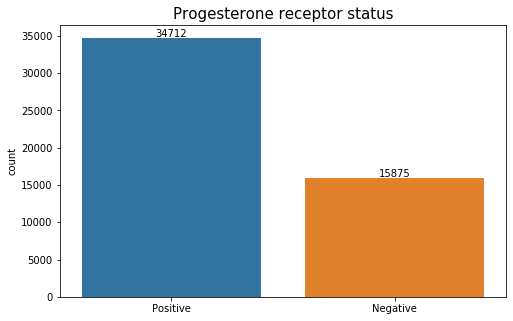

In [786]:
ax = sns.countplot(data = df, x = 'PR_STATUS')
ax.set_title('Progesterone receptor status', fontsize=15)
ax.set_xlabel('')
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2, height+200, height, ha='center')

In [787]:
contingency = pd.crosstab(df['NEWVITALSTATUS'], df['PR_STATUS'])
contingency

PR_STATUS,Negative,Positive
NEWVITALSTATUS,,
A,15698,34279
D,177,433


In [788]:
chi2_stat, p_val, dof, expected = chi2_contingency(contingency)
print(p_val)

0.2214756869181663


In [789]:
df['PR_STATUS'] = df['PR_STATUS'].astype(str)
df['PR_POS'] = df.groupby('PATIENTID')['PR_STATUS'].transform(lambda patient: True if any('Positive' in tumour for tumour in patient) else False)
df.head()

,PATIENTID,SEX,LINKNUMBER,ETHNICITY,NEWVITALSTATUS,VITALSTATUSDATE,TUMOURID,DIAGNOSISDATEBEST,SITE_ICD10_O2_3CHAR,PR_STATUS,HER2_STATUS,CANCERCAREPLANINTENT,PERFORMANCESTATUS,ACE27,DATE_FIRST_SURGERY,LATERALITY,QUINTILE_2015,NUMBER_TUMOURS,SC500,SC501,SC502,SC503,SC504,SC505,SC506,SC508,BEH_BENIGN,BEH_MALIG,BEH_MICINV,BEH_INSITU,BEH_UNCERT,T0,T1,T2,T3,T4,N0,N1,N2,N3,M1,STAGE0,STAGE1,STAGE2,STAGE3,STAGE4,GRADE1,GRADE2,GRADE3,GRADE4,AGE_MEAN,L0801,L1001,L1701,L0201,L0401,L1201,L0301,L0901,ER_POS,PR_POS
277,10000752,F,810000752,White British,A,2017-01-16,10335805,2015-11-11,C50,nan,NaN,NaN,NaN,NaN,2016-09-18,L,1 - least deprived,1,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,68.0,True,False,False,False,False,False,False,False,False,False
383,10001050,F,810001050,White British,A,2017-01-16,10335823,2015-10-24,C50,nan,NaN,Z,NaN,NaN,2015-12-15,L,4,1,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False,False,False,True,False,False,True,False,86.0,False,False,False,False,True,False,False,False,False,False
709,10001824,F,810001824,Other ethnic group,A,2017-01-17,10335879,2015-03-15,C50,nan,NaN,C,1,NaN,2015-03-15,L,4,1,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,True,False,False,87.0,True,False,False,False,False,False,False,False,False,False
795,10002078,F,810002078,NaN,A,2017-01-14,10335895,2015-06-10,C50,nan,NaN,NaN,NaN,NaN,2015-07-25,L,1 - least deprived,1,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,False,True,False,False,True,False,False,72.0,False,False,True,False,False,False,False,False,False,False
1301,10003284,F,810003284,NaN,A,2017-01-16,10335978,2014-10-10,C50,nan,NaN,C,NaN,NaN,2014-10-10,L,1 - least deprived,1,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,True,False,False,False,False,False,False,True,False,False,False,False,True,False,80.0,True,False,False,False,False,False,False,False,False,False


In [790]:
df = df.drop(['PR_STATUS'], axis = 1)

In [791]:
# df['PR_SCORE'].value_counts()

In [792]:
# def pr_score(value):
#     if value == 1:
#         return np.nan
#     else:
#         return value

# df['PR_SCORE'] = df['PR_SCORE'].apply(pr_score)
# df['PR_SCORE'].value_counts()

In [793]:
# ax = sns.countplot(data = df, x = 'PR_SCORE')
# plt.gcf().set_size_inches(8,6)

In [794]:
# df['PR_SCORE'] = df['PR_SCORE'].astype(str)
# df['PRSCORE0'] = df.groupby('PATIENTID')['PR_SCORE'].transform(lambda patient: True if any('0.0' in tumour for tumour in patient) else False)
# df['PRSCORE2'] = df.groupby('PATIENTID')['PR_SCORE'].transform(lambda patient: True if any('2.0' in tumour for tumour in patient) else False)
# df['PRSCORE3'] = df.groupby('PATIENTID')['PR_SCORE'].transform(lambda patient: True if any('3.0' in tumour for tumour in patient) else False)
# df['PRSCORE4'] = df.groupby('PATIENTID')['PR_SCORE'].transform(lambda patient: True if any('4.0' in tumour for tumour in patient) else False)
# df['PRSCORE5'] = df.groupby('PATIENTID')['PR_SCORE'].transform(lambda patient: True if any('5.0' in tumour for tumour in patient) else False)
# df['PRSCORE6'] = df.groupby('PATIENTID')['PR_SCORE'].transform(lambda patient: True if any('6.0' in tumour for tumour in patient) else False)
# df['PRSCORE7'] = df.groupby('PATIENTID')['PR_SCORE'].transform(lambda patient: True if any('7.0' in tumour for tumour in patient) else False)
# df['PRSCORE8'] = df.groupby('PATIENTID')['PR_SCORE'].transform(lambda patient: True if any('8.0' in tumour for tumour in patient) else False)
# df.head()

In [795]:
# df = df.drop(['PR_SCORE'], axis = 1)
# df.head()

In [796]:
df['HER2_STATUS'].value_counts()

N     68200
P     11302
B      3428
Pm      225
X       194
Name: HER2_STATUS, dtype: int64

In [797]:
df['HER2_STATUS'] = df['HER2_STATUS'].astype(str)
def her2_status(value):
    if value.startswith('P'):
        return 'Positive'
    elif value.startswith('N'):
        return 'Negative'    
    elif value == 'X' or value == 'B' or value == 'nan':
        return np.nan        
    else:
        return value

df['HER2_STATUS'] = df['HER2_STATUS'].apply(her2_status)
df['HER2_STATUS'].value_counts()

Negative    68200
Positive    11527
Name: HER2_STATUS, dtype: int64

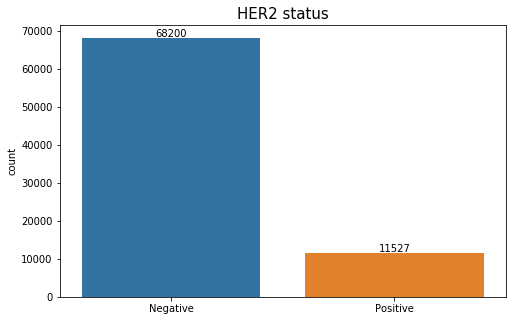

In [798]:
ax = sns.countplot(data = df, x = 'HER2_STATUS')
ax.set_title('HER2 status', fontsize=15)
ax.set_xlabel('')
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2, height+200, height, ha='center')

In [799]:
contingency = pd.crosstab(df['NEWVITALSTATUS'], df['HER2_STATUS'])
contingency

HER2_STATUS,Negative,Positive
NEWVITALSTATUS,,
A,67378,11411
D,822,116


In [800]:
chi2_stat, p_val, dof, expected = chi2_contingency(contingency)
print(p_val)

0.07419326850459006


In [801]:
df['HER2_STATUS'] = df['HER2_STATUS'].astype(str)
df['HER_POS'] = df.groupby('PATIENTID')['HER2_STATUS'].transform(lambda patient: True if any('Positive' in tumour for tumour in patient) else False)
df.head()

,PATIENTID,SEX,LINKNUMBER,ETHNICITY,NEWVITALSTATUS,VITALSTATUSDATE,TUMOURID,DIAGNOSISDATEBEST,SITE_ICD10_O2_3CHAR,HER2_STATUS,CANCERCAREPLANINTENT,PERFORMANCESTATUS,ACE27,DATE_FIRST_SURGERY,LATERALITY,QUINTILE_2015,NUMBER_TUMOURS,SC500,SC501,SC502,SC503,SC504,SC505,SC506,SC508,BEH_BENIGN,BEH_MALIG,BEH_MICINV,BEH_INSITU,BEH_UNCERT,T0,T1,T2,T3,T4,N0,N1,N2,N3,M1,STAGE0,STAGE1,STAGE2,STAGE3,STAGE4,GRADE1,GRADE2,GRADE3,GRADE4,AGE_MEAN,L0801,L1001,L1701,L0201,L0401,L1201,L0301,L0901,ER_POS,PR_POS,HER_POS
277,10000752,F,810000752,White British,A,2017-01-16,10335805,2015-11-11,C50,nan,NaN,NaN,NaN,2016-09-18,L,1 - least deprived,1,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,68.0,True,False,False,False,False,False,False,False,False,False,False
383,10001050,F,810001050,White British,A,2017-01-16,10335823,2015-10-24,C50,nan,Z,NaN,NaN,2015-12-15,L,4,1,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False,False,False,True,False,False,True,False,86.0,False,False,False,False,True,False,False,False,False,False,False
709,10001824,F,810001824,Other ethnic group,A,2017-01-17,10335879,2015-03-15,C50,nan,C,1,NaN,2015-03-15,L,4,1,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,True,False,False,87.0,True,False,False,False,False,False,False,False,False,False,False
795,10002078,F,810002078,NaN,A,2017-01-14,10335895,2015-06-10,C50,nan,NaN,NaN,NaN,2015-07-25,L,1 - least deprived,1,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,False,True,False,False,True,False,False,72.0,False,False,True,False,False,False,False,False,False,False,False
1301,10003284,F,810003284,NaN,A,2017-01-16,10335978,2014-10-10,C50,nan,C,NaN,NaN,2014-10-10,L,1 - least deprived,1,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,True,False,False,False,False,False,False,True,False,False,False,False,True,False,80.0,True,False,False,False,False,False,False,False,False,False,False


In [802]:
df = df.drop(['HER2_STATUS'], axis = 1)

In [803]:
df['CANCERCAREPLANINTENT'].value_counts()

C     45559
9      4804
Z      1763
X       195
Cm      183
Zm        3
Name: CANCERCAREPLANINTENT, dtype: int64

In [804]:
df['CANCERCAREPLANINTENT'] = df['CANCERCAREPLANINTENT'].astype(str)
def planintent(value):
    if value.startswith('C'):
        return 'Curative'
    elif value.startswith('Z'):
        return 'Non curative'
    elif value == 'X':
        return 'No active treatment'
    elif value == '9' or value == 'nan':
        return np.nan
    else:
        return value

df['CANCERCAREPLANINTENT'] = df['CANCERCAREPLANINTENT'].apply(planintent)
df['CANCERCAREPLANINTENT'].value_counts()

Curative               45742
Non curative            1766
No active treatment      195
Name: CANCERCAREPLANINTENT, dtype: int64

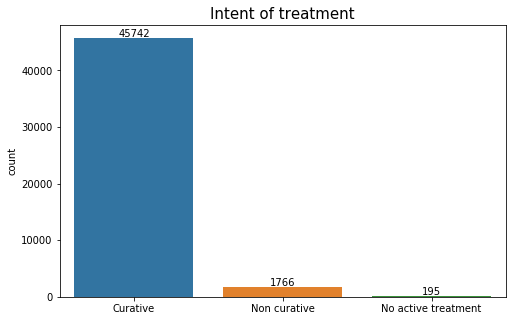

In [805]:
ax = sns.countplot(data = df, x = 'CANCERCAREPLANINTENT', order=['Curative','Non curative','No active treatment'])
ax.set_title('Intent of treatment', fontsize=15)
ax.set_xlabel('')
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2, height+200, height, ha='center')

In [806]:
contingency = pd.crosstab(df['NEWVITALSTATUS'], df['CANCERCAREPLANINTENT'])
contingency

CANCERCAREPLANINTENT,Curative,No active treatment,Non curative
NEWVITALSTATUS,,,
A,45202,193,1747
D,540,2,19


In [807]:
chi2_stat, p_val, dof, expected = chi2_contingency(contingency)
print(p_val)

0.905584198306186


In [808]:
df['CANCERCAREPLANINTENT'] = df['CANCERCAREPLANINTENT'].astype(str)
df['CURATIVE_TREAT'] = df.groupby('PATIENTID')['CANCERCAREPLANINTENT'].transform(lambda patient: True if any('Curative' in tumour for tumour in patient) else False)
df['NONCURATIVE_TREAT'] = df.groupby('PATIENTID')['CANCERCAREPLANINTENT'].transform(lambda patient: True if any('Non curative' in tumour for tumour in patient) else False)
df['NO_ACTIVE_TREAT'] = df.groupby('PATIENTID')['CANCERCAREPLANINTENT'].transform(lambda patient: True if any('No active treatment' in tumour for tumour in patient) else False)
df.head()

,PATIENTID,SEX,LINKNUMBER,ETHNICITY,NEWVITALSTATUS,VITALSTATUSDATE,TUMOURID,DIAGNOSISDATEBEST,SITE_ICD10_O2_3CHAR,CANCERCAREPLANINTENT,PERFORMANCESTATUS,ACE27,DATE_FIRST_SURGERY,LATERALITY,QUINTILE_2015,NUMBER_TUMOURS,SC500,SC501,SC502,SC503,SC504,SC505,SC506,SC508,BEH_BENIGN,BEH_MALIG,BEH_MICINV,BEH_INSITU,BEH_UNCERT,T0,T1,T2,T3,T4,N0,N1,N2,N3,M1,STAGE0,STAGE1,STAGE2,STAGE3,STAGE4,GRADE1,GRADE2,GRADE3,GRADE4,AGE_MEAN,L0801,L1001,L1701,L0201,L0401,L1201,L0301,L0901,ER_POS,PR_POS,HER_POS,CURATIVE_TREAT,NONCURATIVE_TREAT,NO_ACTIVE_TREAT
277,10000752,F,810000752,White British,A,2017-01-16,10335805,2015-11-11,C50,nan,NaN,NaN,2016-09-18,L,1 - least deprived,1,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,68.0,True,False,False,False,False,False,False,False,False,False,False,False,False,False
383,10001050,F,810001050,White British,A,2017-01-16,10335823,2015-10-24,C50,Non curative,NaN,NaN,2015-12-15,L,4,1,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False,False,False,True,False,False,True,False,86.0,False,False,False,False,True,False,False,False,False,False,False,False,True,False
709,10001824,F,810001824,Other ethnic group,A,2017-01-17,10335879,2015-03-15,C50,Curative,1,NaN,2015-03-15,L,4,1,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,True,False,False,87.0,True,False,False,False,False,False,False,False,False,False,False,True,False,False
795,10002078,F,810002078,NaN,A,2017-01-14,10335895,2015-06-10,C50,nan,NaN,NaN,2015-07-25,L,1 - least deprived,1,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,False,True,False,False,True,False,False,72.0,False,False,True,False,False,False,False,False,False,False,False,False,False,False
1301,10003284,F,810003284,NaN,A,2017-01-16,10335978,2014-10-10,C50,Curative,NaN,NaN,2014-10-10,L,1 - least deprived,1,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,True,False,False,False,False,False,False,True,False,False,False,False,True,False,80.0,True,False,False,False,False,False,False,False,False,False,False,True,False,False


In [809]:
df = df.drop(['CANCERCAREPLANINTENT'], axis = 1)

In [810]:
df['PERFORMANCESTATUS'].value_counts()

0     20718
9     11172
1      2871
2      1064
3       817
4       264
1m      122
2m       38
3m       14
4m        5
Name: PERFORMANCESTATUS, dtype: int64

In [811]:
df['PERFORMANCESTATUS'] = df['PERFORMANCESTATUS'].astype(str)
def perfstatus(value):
    if value.startswith('0'):
        return '0'
    elif value.startswith('1'):
        return '1'
    elif value.startswith('2'):
        return '2'
    elif value.startswith('3'):
        return '3'
    elif value.startswith('4'):
        return '4'
    elif value == '9' or value == 'nan':
        return np.nan
    else:
        return value

df['PERFORMANCESTATUS'] = df['PERFORMANCESTATUS'].apply(perfstatus)
df['PERFORMANCESTATUS'].value_counts()

0    20718
1     2993
2     1102
3      831
4      269
Name: PERFORMANCESTATUS, dtype: int64

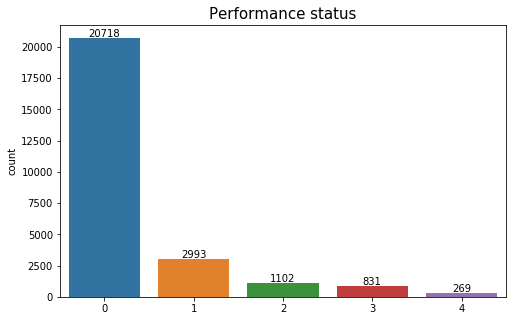

In [812]:
ax = sns.countplot(data = df, x = 'PERFORMANCESTATUS', order = ['0', '1', '2', '3', '4'])
ax.set_title('Performance status', fontsize=15)
ax.set_xlabel('')
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2, height+100, height, ha='center')

In [813]:
contingency = pd.crosstab(df['NEWVITALSTATUS'], df['PERFORMANCESTATUS'])
contingency

PERFORMANCESTATUS,0,1,2,3,4
NEWVITALSTATUS,,,,,
A,20495,2958,1085,824,265
D,223,35,17,7,4


In [814]:
chi2_stat, p_val, dof, expected = chi2_contingency(contingency)
print(p_val)

0.5432812326230414


In [815]:
df['PERFORMANCESTATUS'] = df['PERFORMANCESTATUS'].astype(str)
df['ECOG0'] = df.groupby('PATIENTID')['PERFORMANCESTATUS'].transform(lambda patient: True if any('0' in tumour for tumour in patient) else False)
df['ECOG1'] = df.groupby('PATIENTID')['PERFORMANCESTATUS'].transform(lambda patient: True if any('1' in tumour for tumour in patient) else False)
df['ECOG2'] = df.groupby('PATIENTID')['PERFORMANCESTATUS'].transform(lambda patient: True if any('2' in tumour for tumour in patient) else False)
df['ECOG3'] = df.groupby('PATIENTID')['PERFORMANCESTATUS'].transform(lambda patient: True if any('3' in tumour for tumour in patient) else False)
df['ECOG4'] = df.groupby('PATIENTID')['PERFORMANCESTATUS'].transform(lambda patient: True if any('4' in tumour for tumour in patient) else False)
df.head()

,PATIENTID,SEX,LINKNUMBER,ETHNICITY,NEWVITALSTATUS,VITALSTATUSDATE,TUMOURID,DIAGNOSISDATEBEST,SITE_ICD10_O2_3CHAR,PERFORMANCESTATUS,ACE27,DATE_FIRST_SURGERY,LATERALITY,QUINTILE_2015,NUMBER_TUMOURS,SC500,SC501,SC502,SC503,SC504,SC505,SC506,SC508,BEH_BENIGN,BEH_MALIG,BEH_MICINV,BEH_INSITU,BEH_UNCERT,T0,T1,T2,T3,T4,N0,N1,N2,N3,M1,STAGE0,STAGE1,STAGE2,STAGE3,STAGE4,GRADE1,GRADE2,GRADE3,GRADE4,AGE_MEAN,L0801,L1001,L1701,L0201,L0401,L1201,L0301,L0901,ER_POS,PR_POS,HER_POS,CURATIVE_TREAT,NONCURATIVE_TREAT,NO_ACTIVE_TREAT,ECOG0,ECOG1,ECOG2,ECOG3,ECOG4
277,10000752,F,810000752,White British,A,2017-01-16,10335805,2015-11-11,C50,nan,NaN,2016-09-18,L,1 - least deprived,1,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,68.0,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
383,10001050,F,810001050,White British,A,2017-01-16,10335823,2015-10-24,C50,nan,NaN,2015-12-15,L,4,1,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False,False,False,True,False,False,True,False,86.0,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False
709,10001824,F,810001824,Other ethnic group,A,2017-01-17,10335879,2015-03-15,C50,1,NaN,2015-03-15,L,4,1,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,True,False,False,87.0,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False
795,10002078,F,810002078,NaN,A,2017-01-14,10335895,2015-06-10,C50,nan,NaN,2015-07-25,L,1 - least deprived,1,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,False,True,False,False,True,False,False,72.0,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1301,10003284,F,810003284,NaN,A,2017-01-16,10335978,2014-10-10,C50,nan,NaN,2014-10-10,L,1 - least deprived,1,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,True,False,False,False,False,False,False,True,False,False,False,False,True,False,80.0,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False


In [816]:
df = df.drop(['PERFORMANCESTATUS'], axis = 1)

In [817]:
df['ACE27'].value_counts()

9     6091
0     2832
1      843
3      447
2      389
3m       4
2m       3
1m       3
Name: ACE27, dtype: int64

In [818]:
df['ACE27'] = df['ACE27'].astype(str)
def ace27(value):
    if value.startswith('0'):
        return '0'
    elif value.startswith('1'):
        return '1'
    elif value.startswith('2'):
        return '2'
    elif value.startswith('3'):
        return '3'
    elif value == '9' or value == 'nan':
        return np.nan
    else:
        return value

df['ACE27'] = df['ACE27'].apply(ace27)
df['ACE27'].value_counts()

0    2832
1     846
3     451
2     392
Name: ACE27, dtype: int64

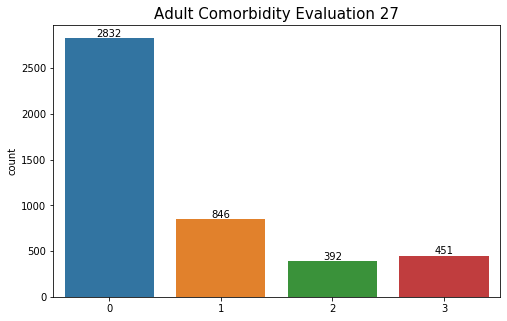

In [819]:
ax = sns.countplot(data = df, x = 'ACE27', order = ['0', '1', '2', '3'])
ax.set_title('Adult Comorbidity Evaluation 27', fontsize=15)
ax.set_xlabel('')
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2, height+15, height, ha='center')

In [820]:
contingency = pd.crosstab(df['NEWVITALSTATUS'], df['ACE27'])
contingency

ACE27,0,1,2,3
NEWVITALSTATUS,,,,
A,2801,837,386,447
D,31,9,6,4


In [821]:
chi2_stat, p_val, dof, expected = chi2_contingency(contingency)
print(p_val)

0.8347756032493934


In [822]:
df['ACE27'] = df['ACE27'].astype(str)
df['ACE0'] = df.groupby('PATIENTID')['ACE27'].transform(lambda patient: True if any('0' in tumour for tumour in patient) else False)
df['ACE1'] = df.groupby('PATIENTID')['ACE27'].transform(lambda patient: True if any('1' in tumour for tumour in patient) else False)
df['ACE2'] = df.groupby('PATIENTID')['ACE27'].transform(lambda patient: True if any('2' in tumour for tumour in patient) else False)
df['ACE3'] = df.groupby('PATIENTID')['ACE27'].transform(lambda patient: True if any('3' in tumour for tumour in patient) else False)
df.head()

,PATIENTID,SEX,LINKNUMBER,ETHNICITY,NEWVITALSTATUS,VITALSTATUSDATE,TUMOURID,DIAGNOSISDATEBEST,SITE_ICD10_O2_3CHAR,ACE27,DATE_FIRST_SURGERY,LATERALITY,QUINTILE_2015,NUMBER_TUMOURS,SC500,SC501,SC502,SC503,SC504,SC505,SC506,SC508,BEH_BENIGN,BEH_MALIG,BEH_MICINV,BEH_INSITU,BEH_UNCERT,T0,T1,T2,T3,T4,N0,N1,N2,N3,M1,STAGE0,STAGE1,STAGE2,STAGE3,STAGE4,GRADE1,GRADE2,GRADE3,GRADE4,AGE_MEAN,L0801,L1001,L1701,L0201,L0401,L1201,L0301,L0901,ER_POS,PR_POS,HER_POS,CURATIVE_TREAT,NONCURATIVE_TREAT,NO_ACTIVE_TREAT,ECOG0,ECOG1,ECOG2,ECOG3,ECOG4,ACE0,ACE1,ACE2,ACE3
277,10000752,F,810000752,White British,A,2017-01-16,10335805,2015-11-11,C50,nan,2016-09-18,L,1 - least deprived,1,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,68.0,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
383,10001050,F,810001050,White British,A,2017-01-16,10335823,2015-10-24,C50,nan,2015-12-15,L,4,1,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False,False,False,True,False,False,True,False,86.0,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False
709,10001824,F,810001824,Other ethnic group,A,2017-01-17,10335879,2015-03-15,C50,nan,2015-03-15,L,4,1,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,True,False,False,87.0,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,False,False,False,False
795,10002078,F,810002078,NaN,A,2017-01-14,10335895,2015-06-10,C50,nan,2015-07-25,L,1 - least deprived,1,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,False,True,False,False,True,False,False,72.0,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1301,10003284,F,810003284,NaN,A,2017-01-16,10335978,2014-10-10,C50,nan,2014-10-10,L,1 - least deprived,1,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,True,False,False,False,False,False,False,True,False,False,False,False,True,False,80.0,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False


In [823]:
df = df.drop(['ACE27'], axis = 1)

In [824]:
pd.set_option('display.max_rows', 20) 

In [825]:
df['DATE_FIRST_SURGERY'].sort_values().dropna()

163470    1995-04-14
200462    2013-01-01
201982    2013-01-01
224969    2013-01-02
382250    2013-01-02
             ...    
185243    2017-01-02
134585    2017-01-12
155385    2017-01-30
194279    2017-02-05
188916    2017-04-21
Name: DATE_FIRST_SURGERY, Length: 89727, dtype: object

In [826]:
pd.set_option('display.max_rows', None) 

In [827]:
df['LATERALITY'].value_counts()

L    54269
R    51005
9     1346
8      107
M       19
B       13
Name: LATERALITY, dtype: int64

In [828]:
df['LATERALITY'] = df['LATERALITY'].astype(str)
def laterality(value):
    if value.startswith('8') or value.startswith('9') or value == 'nan':
        return np.nan
    else:
        return value

df['LATERALITY'] = df['LATERALITY'].apply(laterality)
df['LATERALITY'].value_counts()

L    54269
R    51005
M       19
B       13
Name: LATERALITY, dtype: int64

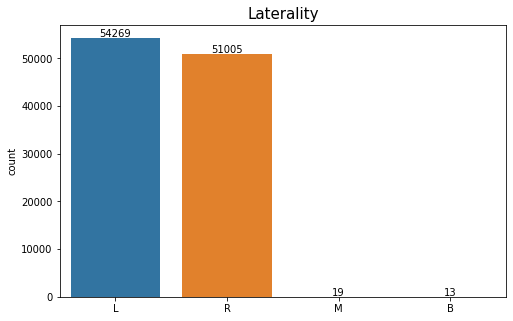

In [829]:
ax = sns.countplot(data = df, x = 'LATERALITY')
ax.set_title('Laterality', fontsize=15)
ax.set_xlabel('')
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2, height+200, height, ha='center')

In [830]:
contingency = pd.crosstab(df['NEWVITALSTATUS'], df['LATERALITY'])
contingency

LATERALITY,B,L,M,R
NEWVITALSTATUS,,,,
A,13,53576,19,50416
D,0,693,0,589


In [831]:
chi2_stat, p_val, dof, expected = chi2_contingency(contingency)
print(p_val)

0.30077866980190154


In [832]:
df['LATERALITY'] = df['LATERALITY'].astype(str)
df['LEFT'] = df.groupby('PATIENTID')['LATERALITY'].transform(lambda patient: True if any('L' in tumour for tumour in patient) else False)
df['RIGHT'] = df.groupby('PATIENTID')['LATERALITY'].transform(lambda patient: True if any('R' in tumour for tumour in patient) else False)
df['MIDLINE'] = df.groupby('PATIENTID')['LATERALITY'].transform(lambda patient: True if any('M' in tumour for tumour in patient) else False)
df['BILATERAL'] = df.groupby('PATIENTID')['LATERALITY'].transform(lambda patient: True if any('B' in tumour for tumour in patient) else False)
df.head()

,PATIENTID,SEX,LINKNUMBER,ETHNICITY,NEWVITALSTATUS,VITALSTATUSDATE,TUMOURID,DIAGNOSISDATEBEST,SITE_ICD10_O2_3CHAR,DATE_FIRST_SURGERY,LATERALITY,QUINTILE_2015,NUMBER_TUMOURS,SC500,SC501,SC502,SC503,SC504,SC505,SC506,SC508,BEH_BENIGN,BEH_MALIG,BEH_MICINV,BEH_INSITU,BEH_UNCERT,T0,T1,T2,T3,T4,N0,N1,N2,N3,M1,STAGE0,STAGE1,STAGE2,STAGE3,STAGE4,GRADE1,GRADE2,GRADE3,GRADE4,AGE_MEAN,L0801,L1001,L1701,L0201,L0401,L1201,L0301,L0901,ER_POS,PR_POS,HER_POS,CURATIVE_TREAT,NONCURATIVE_TREAT,NO_ACTIVE_TREAT,ECOG0,ECOG1,ECOG2,ECOG3,ECOG4,ACE0,ACE1,ACE2,ACE3,LEFT,RIGHT,MIDLINE,BILATERAL
277,10000752,F,810000752,White British,A,2017-01-16,10335805,2015-11-11,C50,2016-09-18,L,1 - least deprived,1,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,68.0,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
383,10001050,F,810001050,White British,A,2017-01-16,10335823,2015-10-24,C50,2015-12-15,L,4,1,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False,False,False,True,False,False,True,False,86.0,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False
709,10001824,F,810001824,Other ethnic group,A,2017-01-17,10335879,2015-03-15,C50,2015-03-15,L,4,1,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,True,False,False,87.0,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False
795,10002078,F,810002078,NaN,A,2017-01-14,10335895,2015-06-10,C50,2015-07-25,L,1 - least deprived,1,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,False,True,False,False,True,False,False,72.0,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
1301,10003284,F,810003284,NaN,A,2017-01-16,10335978,2014-10-10,C50,2014-10-10,L,1 - least deprived,1,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,True,False,False,False,False,False,False,True,False,False,False,False,True,False,80.0,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False


In [833]:
df = df.drop(['LATERALITY'], axis = 1)

In [834]:
df['QUINTILE_2015'].value_counts()

1 - least deprived    25113
2                     24423
3                     21960
4                     19193
5 - most deprived     16071
Name: QUINTILE_2015, dtype: int64

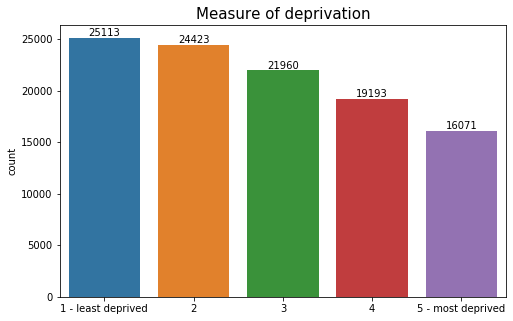

In [835]:
ax = sns.countplot(data = df, x = 'QUINTILE_2015', order = ['1 - least deprived', '2', '3', '4', '5 - most deprived'])
ax.set_title('Measure of deprivation', fontsize=15)
ax.set_xlabel('')
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2, height+200, height, ha='center')

In [836]:
contingency = pd.crosstab(df['NEWVITALSTATUS'], df['QUINTILE_2015'])
contingency

QUINTILE_2015,1 - least deprived,2,3,4,5 - most deprived
NEWVITALSTATUS,,,,,
A,24811,24126,21674,18976,15864
D,302,297,286,217,207


In [837]:
chi2_stat, p_val, dof, expected = chi2_contingency(contingency)
print(p_val)

0.5340796204381032


In [838]:
df['QUINTILE_2015'] = df['QUINTILE_2015'].astype(str)
df['DEPR1'] = df.groupby('PATIENTID')['QUINTILE_2015'].transform(lambda patient: True if any('1 - least deprived' in tumour for tumour in patient) else False)
df['DEPR2'] = df.groupby('PATIENTID')['QUINTILE_2015'].transform(lambda patient: True if any('2' in tumour for tumour in patient) else False)
df['DEPR3'] = df.groupby('PATIENTID')['QUINTILE_2015'].transform(lambda patient: True if any('3' in tumour for tumour in patient) else False)
df['DEPR4'] = df.groupby('PATIENTID')['QUINTILE_2015'].transform(lambda patient: True if any('4' in tumour for tumour in patient) else False)
df['DEPR5'] = df.groupby('PATIENTID')['QUINTILE_2015'].transform(lambda patient: True if any('5 - most deprived' in tumour for tumour in patient) else False)
df.head()

,PATIENTID,SEX,LINKNUMBER,ETHNICITY,NEWVITALSTATUS,VITALSTATUSDATE,TUMOURID,DIAGNOSISDATEBEST,SITE_ICD10_O2_3CHAR,DATE_FIRST_SURGERY,QUINTILE_2015,NUMBER_TUMOURS,SC500,SC501,SC502,SC503,SC504,SC505,SC506,SC508,BEH_BENIGN,BEH_MALIG,BEH_MICINV,BEH_INSITU,BEH_UNCERT,T0,T1,T2,T3,T4,N0,N1,N2,N3,M1,STAGE0,STAGE1,STAGE2,STAGE3,STAGE4,GRADE1,GRADE2,GRADE3,GRADE4,AGE_MEAN,L0801,L1001,L1701,L0201,L0401,L1201,L0301,L0901,ER_POS,PR_POS,HER_POS,CURATIVE_TREAT,NONCURATIVE_TREAT,NO_ACTIVE_TREAT,ECOG0,ECOG1,ECOG2,ECOG3,ECOG4,ACE0,ACE1,ACE2,ACE3,LEFT,RIGHT,MIDLINE,BILATERAL,DEPR1,DEPR2,DEPR3,DEPR4,DEPR5
277,10000752,F,810000752,White British,A,2017-01-16,10335805,2015-11-11,C50,2016-09-18,1 - least deprived,1,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,68.0,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,False
383,10001050,F,810001050,White British,A,2017-01-16,10335823,2015-10-24,C50,2015-12-15,4,1,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False,False,False,True,False,False,True,False,86.0,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False
709,10001824,F,810001824,Other ethnic group,A,2017-01-17,10335879,2015-03-15,C50,2015-03-15,4,1,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,True,False,False,87.0,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False
795,10002078,F,810002078,NaN,A,2017-01-14,10335895,2015-06-10,C50,2015-07-25,1 - least deprived,1,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,False,True,False,False,True,False,False,72.0,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,False
1301,10003284,F,810003284,NaN,A,2017-01-16,10335978,2014-10-10,C50,2014-10-10,1 - least deprived,1,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,True,False,False,False,False,False,False,True,False,False,False,False,True,False,80.0,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,False


In [839]:
df = df.drop(['QUINTILE_2015'], axis = 1)

In [840]:
df['VITALSTATUSDATE'] = pd.to_datetime(df['VITALSTATUSDATE'])
df['DIAGNOSISDATEBEST'] = pd.to_datetime(df['DIAGNOSISDATEBEST'])
df['CANCER_TIME'] = df['VITALSTATUSDATE'] - df['DIAGNOSISDATEBEST']
df['CANCER_DAYS'] = df['CANCER_TIME'] / np.timedelta64(1, 'D')
df['CANCER_MONTHS'] = df['CANCER_TIME'] / np.timedelta64(1, 'M')
df['CANCER_YEARS'] = df['CANCER_TIME'] / np.timedelta64(1, 'Y')
df[['VITALSTATUSDATE', 'DIAGNOSISDATEBEST', 'CANCER_DAYS', 'CANCER_MONTHS', 'CANCER_YEARS']].head()

,VITALSTATUSDATE,DIAGNOSISDATEBEST,CANCER_DAYS,CANCER_MONTHS,CANCER_YEARS
277,2017-01-16,2015-11-11,432.0,14.193310,1.182776
383,2017-01-16,2015-10-24,450.0,14.784698,1.232058
709,2017-01-17,2015-03-15,674.0,22.144192,1.845349
795,2017-01-14,2015-06-10,584.0,19.187252,1.598938
1301,2017-01-16,2014-10-10,829.0,27.236699,2.269725


In [841]:
df['CANCER_YEARS'].describe()

count    106760.000000
mean          2.515608
std           0.876091
min           0.000000
25%           1.754998
50%           2.521612
75%           3.271799
max           4.043889
Name: CANCER_YEARS, dtype: float64

In [842]:
df[['NEWVITALSTATUS','VITALSTATUSDATE', 'DIAGNOSISDATEBEST', 'CANCER_DAYS', 'CANCER_MONTHS', 'CANCER_YEARS']].sort_values(by = 'CANCER_DAYS').head(10)

,NEWVITALSTATUS,VITALSTATUSDATE,DIAGNOSISDATEBEST,CANCER_DAYS,CANCER_MONTHS,CANCER_YEARS
467037,D,2015-12-31,2015-12-31,0.0,0.000000,0.000000
466886,D,2014-12-12,2014-12-12,0.0,0.000000,0.000000
466613,D,2015-12-10,2015-12-09,1.0,0.032855,0.002738
466931,D,2014-08-09,2014-08-08,1.0,0.032855,0.002738
467635,D,2015-11-25,2015-11-24,1.0,0.032855,0.002738
467462,D,2013-03-09,2013-03-07,2.0,0.065710,0.005476
466734,D,2015-10-17,2015-10-15,2.0,0.065710,0.005476
467262,D,2013-05-24,2013-05-21,3.0,0.098565,0.008214
466690,D,2015-11-06,2015-11-03,3.0,0.098565,0.008214
466777,D,2013-11-16,2013-11-13,3.0,0.098565,0.008214


In [843]:
dead = df[df['NEWVITALSTATUS'] == 'D']
dead.head()

,PATIENTID,SEX,LINKNUMBER,ETHNICITY,NEWVITALSTATUS,VITALSTATUSDATE,TUMOURID,DIAGNOSISDATEBEST,SITE_ICD10_O2_3CHAR,DATE_FIRST_SURGERY,NUMBER_TUMOURS,SC500,SC501,SC502,SC503,SC504,SC505,SC506,SC508,BEH_BENIGN,BEH_MALIG,BEH_MICINV,BEH_INSITU,BEH_UNCERT,T0,T1,T2,T3,T4,N0,N1,N2,N3,M1,STAGE0,STAGE1,STAGE2,STAGE3,STAGE4,GRADE1,GRADE2,GRADE3,GRADE4,AGE_MEAN,L0801,L1001,L1701,L0201,L0401,L1201,L0301,L0901,ER_POS,PR_POS,HER_POS,CURATIVE_TREAT,NONCURATIVE_TREAT,NO_ACTIVE_TREAT,ECOG0,ECOG1,ECOG2,ECOG3,ECOG4,ACE0,ACE1,ACE2,ACE3,LEFT,RIGHT,MIDLINE,BILATERAL,DEPR1,DEPR2,DEPR3,DEPR4,DEPR5,CANCER_TIME,CANCER_DAYS,CANCER_MONTHS,CANCER_YEARS
465886,10038511,F,810038511,White British,D,2015-06-22,10338349,2015-05-13,C50,2015-06-11,1,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,True,False,False,False,False,False,False,True,False,False,True,False,False,False,73.0,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,40 days,40.0,1.314195,0.109516
466012,10093511,F,810093511,NaN,D,2016-03-04,10342049,2015-06-30,C50,2015-06-30,1,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,True,False,False,83.0,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,248 days,248.0,8.148011,0.679001
466420,10278105,F,810278105,White British,D,2015-08-20,10354573,2015-04-13,C50,2015-04-13,1,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,True,False,False,False,67.0,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False,129 days,129.0,4.238280,0.353190
466553,20000254,F,820000254,White British,D,2015-10-04,20000254,2014-01-16,C50,2014-07-09,1,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,True,False,False,True,False,False,False,False,False,False,True,False,False,True,False,False,48.0,False,False,False,False,False,False,True,False,True,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,626 days,626.0,20.567157,1.713930
466554,20000320,F,820000320,White British,D,2015-05-31,20000320,2014-03-20,C50,2014-04-09,1,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,True,False,False,False,False,False,False,True,False,False,False,False,True,False,53.0,False,False,False,False,False,False,True,False,True,False,False,True,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,437 days,437.0,14.357584,1.196465


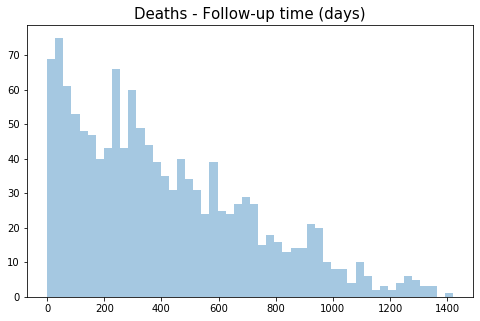

In [844]:
ax = sns.distplot(dead['CANCER_DAYS'], hist = True, kde = False, bins = 50)
ax.set_title('Deaths - Follow-up time (days)', fontsize=15)
ax.set_xlabel('');

Text(0.5, 0, '')

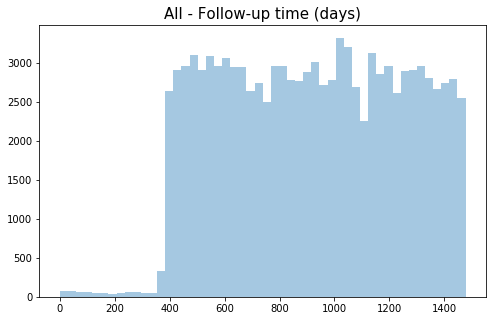

In [845]:
ax = sns.distplot(df['CANCER_DAYS'], hist = True, kde = False, bins = 50)
ax.set_title('All - Follow-up time (days)', fontsize=15)
ax.set_xlabel('')

Text(0.5, 0, '')

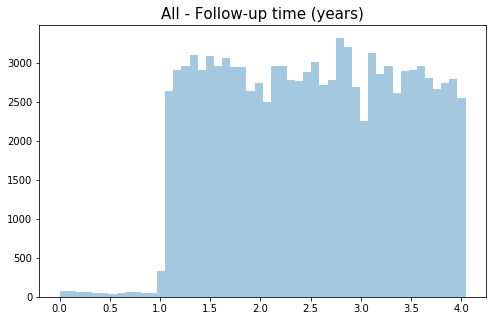

In [846]:
ax = sns.distplot(df['CANCER_YEARS'], hist = True, kde = False, bins = 50)
ax.set_title('All - Follow-up time (years)', fontsize=15)
ax.set_xlabel('')

In [847]:
df['CANCER_DAYS_MEAN'] = df.groupby('PATIENTID')['CANCER_DAYS'].transform(np.mean)
df['CANCER_MONTHS_MEAN'] = df.groupby('PATIENTID')['CANCER_MONTHS'].transform(np.mean)
df['CANCER_YEARS_MEAN'] = df.groupby('PATIENTID')['CANCER_YEARS'].transform(np.mean)
df.head()

,PATIENTID,SEX,LINKNUMBER,ETHNICITY,NEWVITALSTATUS,VITALSTATUSDATE,TUMOURID,DIAGNOSISDATEBEST,SITE_ICD10_O2_3CHAR,DATE_FIRST_SURGERY,NUMBER_TUMOURS,SC500,SC501,SC502,SC503,SC504,SC505,SC506,SC508,BEH_BENIGN,BEH_MALIG,BEH_MICINV,BEH_INSITU,BEH_UNCERT,T0,T1,T2,T3,T4,N0,N1,N2,N3,M1,STAGE0,STAGE1,STAGE2,STAGE3,STAGE4,GRADE1,GRADE2,GRADE3,GRADE4,AGE_MEAN,L0801,L1001,L1701,L0201,L0401,L1201,L0301,L0901,ER_POS,PR_POS,HER_POS,CURATIVE_TREAT,NONCURATIVE_TREAT,NO_ACTIVE_TREAT,ECOG0,ECOG1,ECOG2,ECOG3,ECOG4,ACE0,ACE1,ACE2,ACE3,LEFT,RIGHT,MIDLINE,BILATERAL,DEPR1,DEPR2,DEPR3,DEPR4,DEPR5,CANCER_TIME,CANCER_DAYS,CANCER_MONTHS,CANCER_YEARS,CANCER_DAYS_MEAN,CANCER_MONTHS_MEAN,CANCER_YEARS_MEAN
277,10000752,F,810000752,White British,A,2017-01-16,10335805,2015-11-11,C50,2016-09-18,1,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,68.0,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,False,432 days,432.0,14.193310,1.182776,432.0,14.193310,1.182776
383,10001050,F,810001050,White British,A,2017-01-16,10335823,2015-10-24,C50,2015-12-15,1,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False,False,False,True,False,False,True,False,86.0,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,450 days,450.0,14.784698,1.232058,450.0,14.784698,1.232058
709,10001824,F,810001824,Other ethnic group,A,2017-01-17,10335879,2015-03-15,C50,2015-03-15,1,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,True,False,False,87.0,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,674 days,674.0,22.144192,1.845349,674.0,22.144192,1.845349
795,10002078,F,810002078,NaN,A,2017-01-14,10335895,2015-06-10,C50,2015-07-25,1,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,False,True,False,False,True,False,False,72.0,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,False,584 days,584.0,19.187252,1.598938,584.0,19.187252,1.598938
1301,10003284,F,810003284,NaN,A,2017-01-16,10335978,2014-10-10,C50,2014-10-10,1,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,True,False,False,False,False,False,False,True,False,False,False,False,True,False,80.0,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,False,829 days,829.0,27.236699,2.269725,829.0,27.236699,2.269725


In [848]:
df[df['PATIENTID'] == 20010794]

,PATIENTID,SEX,LINKNUMBER,ETHNICITY,NEWVITALSTATUS,VITALSTATUSDATE,TUMOURID,DIAGNOSISDATEBEST,SITE_ICD10_O2_3CHAR,DATE_FIRST_SURGERY,NUMBER_TUMOURS,SC500,SC501,SC502,SC503,SC504,SC505,SC506,SC508,BEH_BENIGN,BEH_MALIG,BEH_MICINV,BEH_INSITU,BEH_UNCERT,T0,T1,T2,T3,T4,N0,N1,N2,N3,M1,STAGE0,STAGE1,STAGE2,STAGE3,STAGE4,GRADE1,GRADE2,GRADE3,GRADE4,AGE_MEAN,L0801,L1001,L1701,L0201,L0401,L1201,L0301,L0901,ER_POS,PR_POS,HER_POS,CURATIVE_TREAT,NONCURATIVE_TREAT,NO_ACTIVE_TREAT,ECOG0,ECOG1,ECOG2,ECOG3,ECOG4,ACE0,ACE1,ACE2,ACE3,LEFT,RIGHT,MIDLINE,BILATERAL,DEPR1,DEPR2,DEPR3,DEPR4,DEPR5,CANCER_TIME,CANCER_DAYS,CANCER_MONTHS,CANCER_YEARS,CANCER_DAYS_MEAN,CANCER_MONTHS_MEAN,CANCER_YEARS_MEAN
142983,20010794,F,820010794,Other white background,A,2017-01-17,20010794,2014-04-29,C50,2014-06-11,3,False,True,False,False,False,True,False,False,False,True,False,False,False,False,True,False,False,False,True,False,False,False,False,False,True,False,False,False,False,True,False,False,62.0,False,False,False,False,False,False,False,True,True,True,True,True,False,False,False,True,False,False,False,False,True,False,False,True,True,False,False,True,False,False,False,False,994 days,994.0,32.657755,2.721480,965.666667,31.726866,2.643906
142984,20010794,F,820010794,Other white background,A,2017-01-17,20129134,2014-06-08,C50,2014-07-20,3,False,True,False,False,False,True,False,False,False,True,False,False,False,False,True,False,False,False,True,False,False,False,False,False,True,False,False,False,False,True,False,False,62.0,False,False,False,False,False,False,False,True,True,True,True,True,False,False,False,True,False,False,False,False,True,False,False,True,True,False,False,True,False,False,False,False,954 days,954.0,31.343559,2.611963,965.666667,31.726866,2.643906
142985,20010794,F,820010794,Other white background,A,2017-01-17,20136414,2014-06-13,C50,NaN,3,False,True,False,False,False,True,False,False,False,True,False,False,False,False,True,False,False,False,True,False,False,False,False,False,True,False,False,False,False,True,False,False,62.0,False,False,False,False,False,False,False,True,True,True,True,True,False,False,False,True,False,False,False,False,True,False,False,True,True,False,False,True,False,False,False,False,949 days,949.0,31.179285,2.598274,965.666667,31.726866,2.643906


In [849]:
df.dtypes

PATIENTID                        int64
SEX                           category
LINKNUMBER                       int64
ETHNICITY                     category
NEWVITALSTATUS                category
VITALSTATUSDATE         datetime64[ns]
TUMOURID                         int64
DIAGNOSISDATEBEST       datetime64[ns]
SITE_ICD10_O2_3CHAR             object
DATE_FIRST_SURGERY              object
NUMBER_TUMOURS                   int64
SC500                             bool
SC501                             bool
SC502                             bool
SC503                             bool
SC504                             bool
SC505                             bool
SC506                             bool
SC508                             bool
BEH_BENIGN                        bool
BEH_MALIG                         bool
BEH_MICINV                        bool
BEH_INSITU                        bool
BEH_UNCERT                        bool
T0                                bool
T1                       

In [850]:
df.columns

Index(['PATIENTID', 'SEX', 'LINKNUMBER', 'ETHNICITY', 'NEWVITALSTATUS',
       'VITALSTATUSDATE', 'TUMOURID', 'DIAGNOSISDATEBEST',
       'SITE_ICD10_O2_3CHAR', 'DATE_FIRST_SURGERY', 'NUMBER_TUMOURS', 'SC500',
       'SC501', 'SC502', 'SC503', 'SC504', 'SC505', 'SC506', 'SC508',
       'BEH_BENIGN', 'BEH_MALIG', 'BEH_MICINV', 'BEH_INSITU', 'BEH_UNCERT',
       'T0', 'T1', 'T2', 'T3', 'T4', 'N0', 'N1', 'N2', 'N3', 'M1', 'STAGE0',
       'STAGE1', 'STAGE2', 'STAGE3', 'STAGE4', 'GRADE1', 'GRADE2', 'GRADE3',
       'GRADE4', 'AGE_MEAN', 'L0801', 'L1001', 'L1701', 'L0201', 'L0401',
       'L1201', 'L0301', 'L0901', 'ER_POS', 'PR_POS', 'HER_POS',
       'CURATIVE_TREAT', 'NONCURATIVE_TREAT', 'NO_ACTIVE_TREAT', 'ECOG0',
       'ECOG1', 'ECOG2', 'ECOG3', 'ECOG4', 'ACE0', 'ACE1', 'ACE2', 'ACE3',
       'LEFT', 'RIGHT', 'MIDLINE', 'BILATERAL', 'DEPR1', 'DEPR2', 'DEPR3',
       'DEPR4', 'DEPR5', 'CANCER_TIME', 'CANCER_DAYS', 'CANCER_MONTHS',
       'CANCER_YEARS', 'CANCER_DAYS_MEAN', 'CANCER_MONT

In [851]:
columns_selected = ['PATIENTID', 'SEX', 'LINKNUMBER', 'ETHNICITY', 'NEWVITALSTATUS', 'NUMBER_TUMOURS', 
       'SC500', 'SC501', 'SC502', 'SC503', 'SC504', 'SC505', 'SC506', 'SC508', 
       'BEH_BENIGN', 'BEH_MALIG', 'BEH_MICINV', 'BEH_INSITU','BEH_UNCERT', 
       'T0', 'T1', 'T2', 'T3', 'T4', 'N0', 'N1', 'N2', 'N3', 'M1',
       'STAGE0', 'STAGE1', 'STAGE2', 'STAGE3', 'STAGE4',
       'GRADE1', 'GRADE2', 'GRADE3', 'GRADE4', 'AGE_MEAN', 'L0801', 'L1001',
       'L1701', 'L0201', 'L0401', 'L1201', 'L0301', 'L0901', 
       'ER_POS','PR_POS', 'HER_POS', 'CURATIVE_TREAT', 'NONCURATIVE_TREAT', 'NO_ACTIVE_TREAT', 
       'ECOG0', 'ECOG1', 'ECOG2', 'ECOG3', 'ECOG4', 
       'ACE0', 'ACE1', 'ACE2', 'ACE3', 'LEFT', 'RIGHT', 'MIDLINE',
       'BILATERAL', 'DEPR1', 'DEPR2', 'DEPR3', 'DEPR4', 'DEPR5', 
       'CANCER_DAYS_MEAN', 'CANCER_MONTHS_MEAN', 'CANCER_YEARS_MEAN']
df = df[columns_selected]
df.head()

,PATIENTID,SEX,LINKNUMBER,ETHNICITY,NEWVITALSTATUS,NUMBER_TUMOURS,SC500,SC501,SC502,SC503,SC504,SC505,SC506,SC508,BEH_BENIGN,BEH_MALIG,BEH_MICINV,BEH_INSITU,BEH_UNCERT,T0,T1,T2,T3,T4,N0,N1,N2,N3,M1,STAGE0,STAGE1,STAGE2,STAGE3,STAGE4,GRADE1,GRADE2,GRADE3,GRADE4,AGE_MEAN,L0801,L1001,L1701,L0201,L0401,L1201,L0301,L0901,ER_POS,PR_POS,HER_POS,CURATIVE_TREAT,NONCURATIVE_TREAT,NO_ACTIVE_TREAT,ECOG0,ECOG1,ECOG2,ECOG3,ECOG4,ACE0,ACE1,ACE2,ACE3,LEFT,RIGHT,MIDLINE,BILATERAL,DEPR1,DEPR2,DEPR3,DEPR4,DEPR5,CANCER_DAYS_MEAN,CANCER_MONTHS_MEAN,CANCER_YEARS_MEAN
277,10000752,F,810000752,White British,A,1,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,68.0,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,False,432.0,14.193310,1.182776
383,10001050,F,810001050,White British,A,1,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False,False,False,True,False,False,True,False,86.0,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,450.0,14.784698,1.232058
709,10001824,F,810001824,Other ethnic group,A,1,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,True,False,False,87.0,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,674.0,22.144192,1.845349
795,10002078,F,810002078,NaN,A,1,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,False,True,False,False,True,False,False,72.0,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,False,584.0,19.187252,1.598938
1301,10003284,F,810003284,NaN,A,1,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,True,False,False,False,False,False,False,True,False,False,False,False,True,False,80.0,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,False,829.0,27.236699,2.269725


In [852]:
df = df.drop_duplicates()
df.shape

(104243, 74)

In [854]:
df[df.groupby('PATIENTID')['PATIENTID'].transform('size') > 1].count()

PATIENTID             0
SEX                   0
LINKNUMBER            0
ETHNICITY             0
NEWVITALSTATUS        0
NUMBER_TUMOURS        0
SC500                 0
SC501                 0
SC502                 0
SC503                 0
SC504                 0
SC505                 0
SC506                 0
SC508                 0
BEH_BENIGN            0
BEH_MALIG             0
BEH_MICINV            0
BEH_INSITU            0
BEH_UNCERT            0
T0                    0
T1                    0
T2                    0
T3                    0
T4                    0
N0                    0
N1                    0
N2                    0
N3                    0
M1                    0
STAGE0                0
STAGE1                0
STAGE2                0
STAGE3                0
STAGE4                0
GRADE1                0
GRADE2                0
GRADE3                0
GRADE4                0
AGE_MEAN              0
L0801                 0
L1001                 0
L1701           

In [855]:
df.isna().sum()

PATIENTID                0
SEX                      0
LINKNUMBER               0
ETHNICITY             6746
NEWVITALSTATUS           0
NUMBER_TUMOURS           0
SC500                    0
SC501                    0
SC502                    0
SC503                    0
SC504                    0
SC505                    0
SC506                    0
SC508                    0
BEH_BENIGN               0
BEH_MALIG                0
BEH_MICINV               0
BEH_INSITU               0
BEH_UNCERT               0
T0                       0
T1                       0
T2                       0
T3                       0
T4                       0
N0                       0
N1                       0
N2                       0
N3                       0
M1                       0
STAGE0                   0
STAGE1                   0
STAGE2                   0
STAGE3                   0
STAGE4                   0
GRADE1                   0
GRADE2                   0
GRADE3                   0
G

In [856]:
df.to_pickle('./Data/avpat_avtum.pickle')